In [1]:
import requests
import pandas as pd

# 0️ Récupérer tous les compteurs disponibles
url_all = "https://portail-api-data.montpellier3m.fr/ecocounter/"
response_all = requests.get(url_all)

if response_all.status_code == 200:
    all_data = response_all.json()

    # Certains endpoints retournent un dict avec "data", d'autres une liste directe.
    if isinstance(all_data, dict) and "data" in all_data:
        all_counters = all_data["data"]
    else:
        all_counters = all_data

    # Extraction des IDs
    counters = [c["id"] for c in all_counters if "id" in c]
    print(f"Nombre de compteurs trouvés : {len(counters)}")

else:
    print("Erreur récupération liste des compteurs :", response_all.status_code)
    counters = []


# Dates pour l'API
from_date = "2024-11-30T00:00:00"
to_date   = "2025-12-01T23:59:59"

data = []

#  BOUCLE PRINCIPALE SUR TOUS LES COMPTEURS
for counter_id in counters:
    print(f"\n Récupération pour : {counter_id}")

    # 1️ Séries temporelles
    url_series = f"https://portail-api-data.montpellier3m.fr/ecocounter_timeseries/{counter_id}/attrs/intensity"
    params = {"fromDate": from_date, "toDate": to_date}
    response = requests.get(url_series, params=params)
    
    if response.status_code == 200:
        data_series = response.json()

        if "index" not in data_series or "values" not in data_series:
            print(f"⚠ Pas de série temporelle pour {counter_id}")
            continue

        df_series_1 = pd.DataFrame({
            "datetime": data_series["index"],
            "intensity": data_series["values"]
        })

        if df_series_1.empty:
            print(f"⚠ Série vide pour {counter_id}")
            continue

        df_series_1["counter_id"] = counter_id

    else:
        print(f"Erreur séries temporelles pour {counter_id} : {response.status_code}")
        continue


    # 2️ Description du compteur
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
    else:
        print(f"⚠ Erreur description pour {counter_id} : {response_desc.status_code}")
        lat = lon = laneId = vehicleType = None

    # Ajout des colonnes statiques
    df_series_1["lat"] = lat
    df_series_1["lon"] = lon
    df_series_1["laneId"] = laneId
    df_series_1["vehicleType"] = vehicleType

    data.append(df_series_1)
    print(f"   → {len(df_series_1)} lignes ajoutées")


# 3️ Fusion finale et export CSV
if data:
    df_brut = pd.concat(data, ignore_index=True)
    df_brut["datetime"] = pd.to_datetime(df_brut["datetime"])
    
    df_brut.to_csv("../data/raw/data_brut_1.csv", index=False)
    print("\n CSV complet enregistré : ../data/raw/data_brut_1.csv")
else:
    print(" Aucune donnée récupérée")


Nombre de compteurs trouvés : 20

 Récupération pour : urn:ngsi-ld:EcoCounter:XTH19101158
   → 8812 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104775
   → 8810 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H20042632
Erreur séries temporelles pour urn:ngsi-ld:EcoCounter:X2H20042632 : 404

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H20063164
   → 8568 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H19070220
   → 8783 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104771
   → 8810 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070350
   → 8787 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070349
   → 8809 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070348
   → 8569 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H22104766
   → 8809 lignes ajoutées

 Récupération pour : urn:ngsi-ld:EcoCounter:X2H21070343
   → 7717 lignes ajoutées

 Récupé

In [2]:
df_brut.groupby("counter_id")["datetime"].agg(["min", "max"])

,min,max
counter_id,,
urn:ngsi-ld:EcoCounter:X2H19070220,2024-11-30 00:00:00+00:00,2025-11-30 23:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H20042635,2024-11-30 00:00:00+00:00,2025-12-01 03:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H20063164,2024-11-30 00:00:00+00:00,2025-09-12 00:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070342,2024-11-30 00:00:00+00:00,2025-11-21 15:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070343,2025-01-14 07:00:00+00:00,2025-12-01 00:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070346,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070348,2024-11-30 00:00:00+00:00,2025-09-23 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070349,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00
urn:ngsi-ld:EcoCounter:X2H21070350,2024-11-30 00:00:00+00:00,2025-01-23 02:00:00+00:00


## 1️ Statistiques descriptives : (les statistiques globales et par compteur)
Moyenne, min, max, écart-type, etc. pour chaque compteur

In [3]:
# Statistiques globales
print("Statistiques globales sur l'intensité :")
print(df_brut["intensity"].describe())

# Statistiques par compteur
stats_par_counter = df_brut.groupby("counter_id")["intensity"].describe()
display(stats_par_counter)

Statistiques globales sur l'intensité :
count    156950.000000
mean         27.675043
std          49.305148
min           0.000000
25%           1.000000
50%           8.000000
75%          30.000000
max         576.000000
Name: intensity, dtype: float64


,count,mean,std,min,25%,50%,75%,max
counter_id,,,,,,,,
urn:ngsi-ld:EcoCounter:X2H19070220,8783.0,51.361722,54.996660,0.0,5.0,39.0,76.0,576.0
urn:ngsi-ld:EcoCounter:X2H20042635,8810.0,27.470375,29.858924,0.0,4.0,19.0,42.0,211.0
urn:ngsi-ld:EcoCounter:X2H20063164,8568.0,2.533497,4.252484,0.0,0.0,1.0,3.0,38.0
urn:ngsi-ld:EcoCounter:X2H21070342,8808.0,17.958220,21.101658,0.0,2.0,12.0,26.0,139.0
urn:ngsi-ld:EcoCounter:X2H21070343,7717.0,1.696514,3.430931,0.0,0.0,0.0,2.0,30.0
urn:ngsi-ld:EcoCounter:X2H21070346,8808.0,9.207993,10.751436,0.0,0.0,5.0,16.0,73.0
urn:ngsi-ld:EcoCounter:X2H21070348,8569.0,22.589567,30.411517,0.0,2.0,12.0,29.0,201.0
urn:ngsi-ld:EcoCounter:X2H21070349,8809.0,64.490180,68.806647,0.0,12.0,42.0,96.0,407.0
urn:ngsi-ld:EcoCounter:X2H21070350,8787.0,2.461022,4.674974,0.0,0.0,1.0,3.0,50.0


## 2️ Calcul de la durée de collecte pour chaque compteur : 
**calculer le nombre de jours pour chaque compteur et créer des groupes selon tes critères :**

In [4]:

# Convertir datetime si ce n'est pas déjà fait
df_brut["datetime"] = pd.to_datetime(df_brut["datetime"])

# Calcul de la durée en jours pour chaque compteur
duration = df_brut.groupby("counter_id")["datetime"].agg(["min", "max"])
duration["days"] = (duration["max"] - duration["min"]).dt.days + 1

# Ajouter une colonne catégorie
def categorize_counter(days):
    if days >= 365:
        return "plus de 365 jours"
    elif days >= 200:
        return "200 jours ou plus"
    elif days < 100:
        return "moins de 100 jours"
    else:
        return "autres"

duration["category"] = duration["days"].apply(categorize_counter)
display(duration)

,min,max,days,category
counter_id,,,,
urn:ngsi-ld:EcoCounter:X2H19070220,2024-11-30 00:00:00+00:00,2025-11-30 23:00:00+00:00,366,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H20042635,2024-11-30 00:00:00+00:00,2025-12-01 03:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H20063164,2024-11-30 00:00:00+00:00,2025-09-12 00:00:00+00:00,287,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070342,2024-11-30 00:00:00+00:00,2025-11-21 15:00:00+00:00,357,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070343,2025-01-14 07:00:00+00:00,2025-12-01 00:00:00+00:00,321,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070346,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H21070348,2024-11-30 00:00:00+00:00,2025-09-23 01:00:00+00:00,298,200 jours ou plus
urn:ngsi-ld:EcoCounter:X2H21070349,2024-11-30 00:00:00+00:00,2025-12-01 01:00:00+00:00,367,plus de 365 jours
urn:ngsi-ld:EcoCounter:X2H21070350,2024-11-30 00:00:00+00:00,2025-01-23 02:00:00+00:00,55,moins de 100 jours


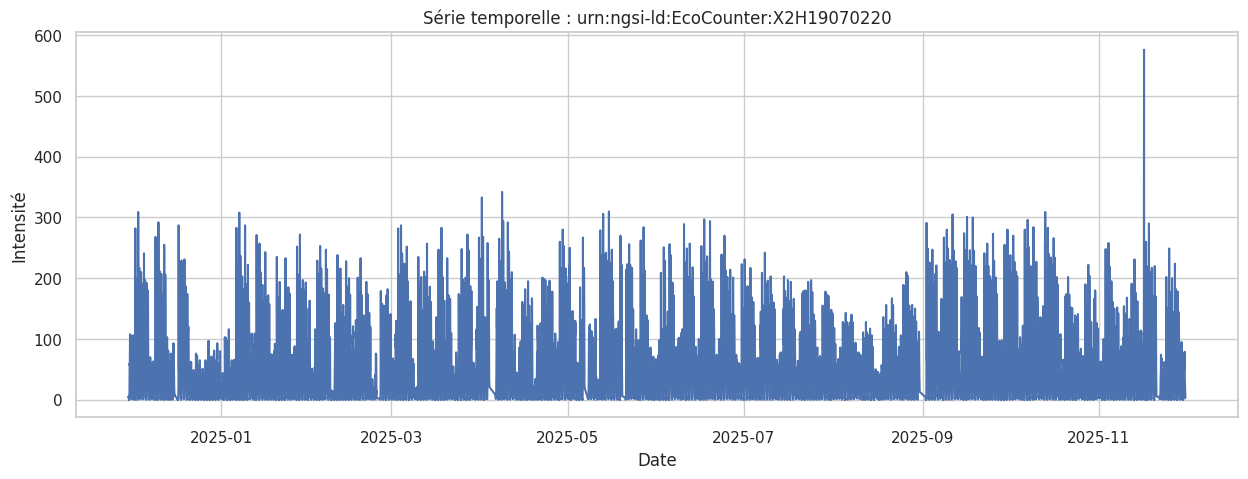

In [5]:

## 4️ Visualisation
#### a) Séries temporelles pour chaque compteur
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Exemple pour un compteur
compteur = "urn:ngsi-ld:EcoCounter:X2H19070220"
df_plot = df_brut[df_brut["counter_id"] == compteur]

plt.figure(figsize=(15,5))
plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)
plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title(f"Série temporelle : {compteur}")
plt.show()

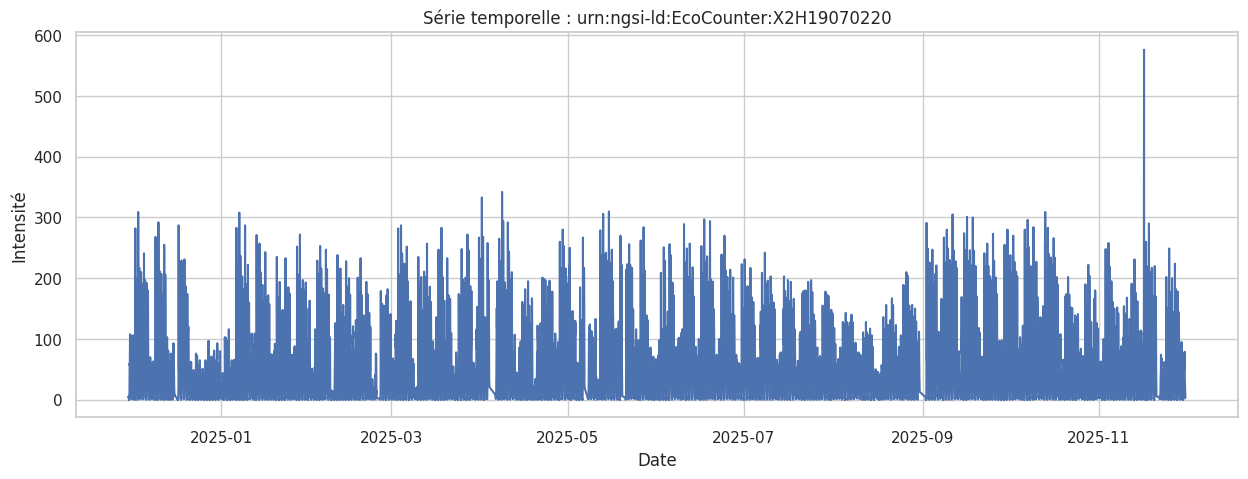

In [6]:

# Exemple pour compteur qui ayant le max intensity
compteur = "urn:ngsi-ld:EcoCounter:X2H19070220"
df_plot = df_brut[df_brut["counter_id"] == compteur]

plt.figure(figsize=(15,5))
plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)
plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title(f"Série temporelle : {compteur}")
plt.show()

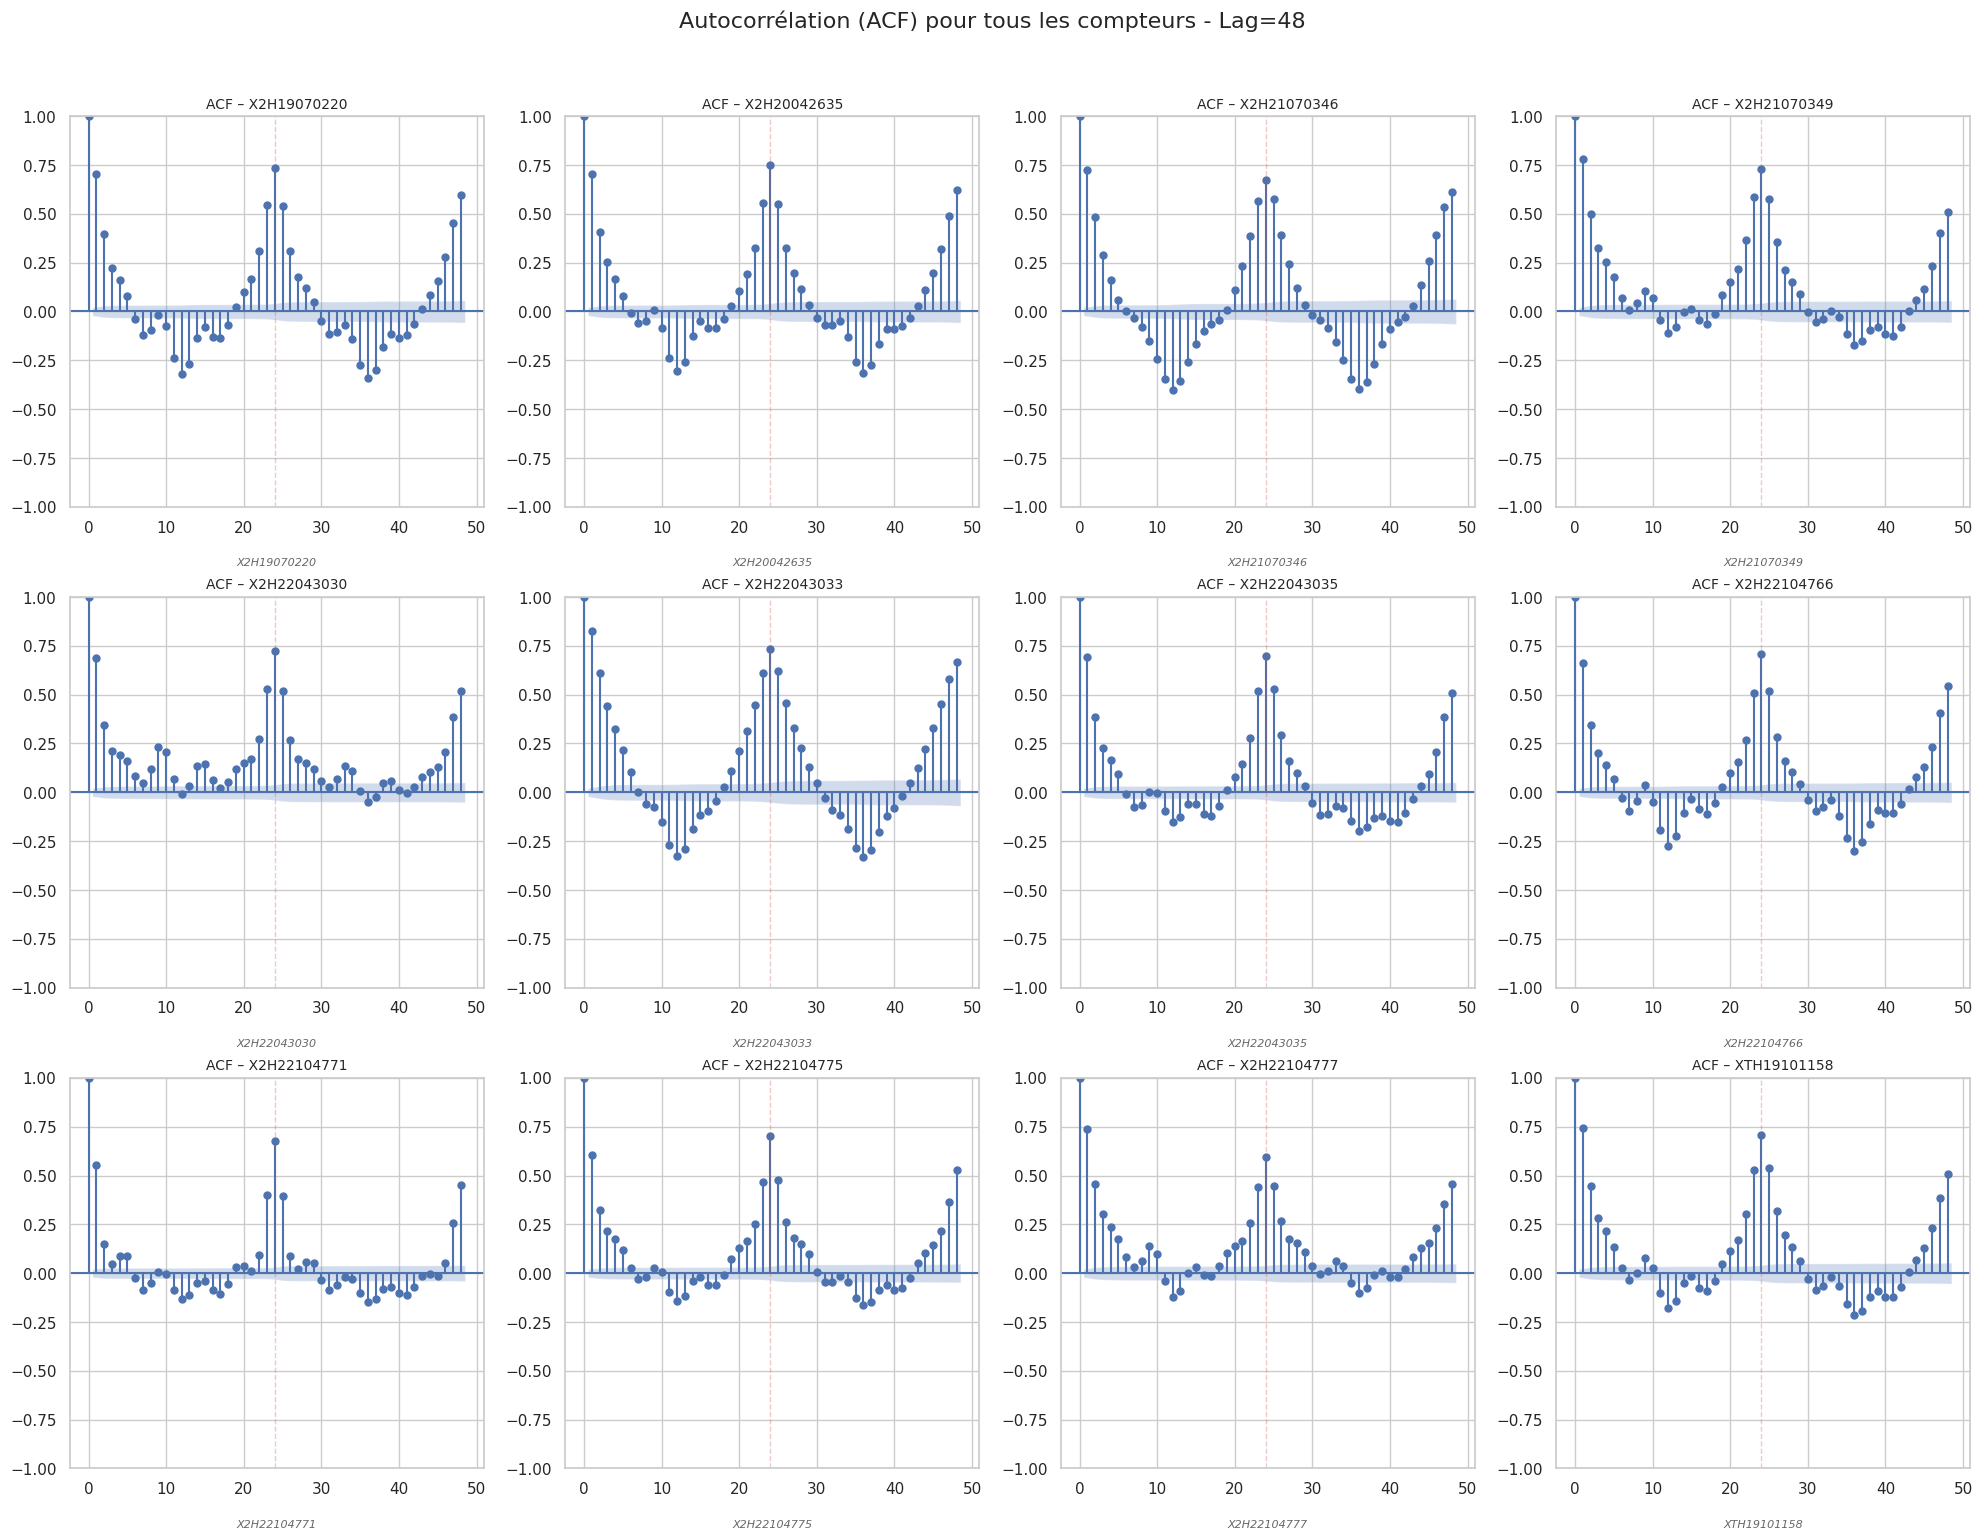

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Liste spécifique des compteurs que tu veux analyser
compteurs_specifiques = [
    "urn:ngsi-ld:EcoCounter:X2H19070220",
    "urn:ngsi-ld:EcoCounter:X2H20042635",
    "urn:ngsi-ld:EcoCounter:X2H21070346",
    "urn:ngsi-ld:EcoCounter:X2H21070349",
    "urn:ngsi-ld:EcoCounter:X2H22043030",
    "urn:ngsi-ld:EcoCounter:X2H22043033",
    "urn:ngsi-ld:EcoCounter:X2H22043035",
    "urn:ngsi-ld:EcoCounter:X2H22104766",
    "urn:ngsi-ld:EcoCounter:X2H22104771",
    "urn:ngsi-ld:EcoCounter:X2H22104775",
    "urn:ngsi-ld:EcoCounter:X2H22104777",
    "urn:ngsi-ld:EcoCounter:XTH19101158"
]

# Configuration de la grille
n_compteurs = len(compteurs_specifiques)
n_cols = 4  # 4 graphiques par ligne (tu peux changer)
n_rows = int(np.ceil(n_compteurs / n_cols))

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplatir pour faciliter l'indexation

# Boucle sur les compteurs spécifiques
for idx, compteur in enumerate(compteurs_specifiques):
    if idx < len(axes):  # Éviter l'erreur si plus d'axes que de compteurs
        # Filtrer les données pour ce compteur
        df_plot = df_brut[df_brut["counter_id"] == compteur].copy()
        df_plot = df_plot.sort_values("datetime")
        series = df_plot["intensity"]
        
        # Plot ACF
        plot_acf(series, lags=48, ax=axes[idx])
        
        # Nom court pour le titre
        short_name = compteur.split(':')[-1]
        axes[idx].set_title(f"ACF – {short_name}", fontsize=10)
        
        # Ajouter une ligne à lag 24 (saisonnalité journalière)
        axes[idx].axvline(x=24, color='r', linestyle='--', alpha=0.3, linewidth=1)
        
        # Ajouter l'ID complet en bas
        axes[idx].text(0.5, -0.15, short_name, 
                    transform=axes[idx].transAxes,
                    fontsize=8, ha='center', alpha=0.7, style='italic')

# Cacher les axes non utilisés
for idx in range(len(compteurs_specifiques), len(axes)):
    axes[idx].axis('off')

# Titre principal
plt.suptitle("Autocorrélation (ACF) pour tous les compteurs - Lag=48", 
            fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


## **Deux catégories de séries temporelles :**

### **1. Séries avec ACF significative (ex: X2H19070220, X2H20042635, XTH19101158)**

- **ACF décroît lentement** → série **non stationnaire**, forte persistance
- Typique des séries avec **tendance** ou **saisonnalité marquée**
- Nécessitent **différenciation** pour modélisation ARIMA

### **2. Séries avec ACF plate/non significative (ex: X2H22104775, X2H20063164, X2H22043033)**

- **ACF reste proche de zéro** sur tous les lags
- Indique une **série stationnaire** mais avec **peu d'autocorrélation temporelle**
- Pourrait ressembler à du **bruit blanc** ou à un processus à mémoire courte
## Interprétation possible :
Différents profils de trafic : Certains compteurs (catégorie 1) suivent des cycles réguliers (heure de pointe, jour/nuit), d'autres (catégorie 2) ont un trafic aléatoire ou constant.
## Conclusion :
**deux groupes de compteurs** avec des dynamiques temporelles très différentes :

- **Groupe 1** : Forte autocorrélation → (ARIMA/SARIMA adapté)
- **Groupe 2** : Peu d'autocorrélation → modèles plus simples

## Lags journaliers choisis : 
1. Lags essentiels à tester :
Lag 1 (J-1) : toujours important

Lag 7 (J-7) : saisonnalité hebdomadaire (très fort pour le trafic)

Lag 14, 21, 28 : cycles mensuels possibles

2. 
Trafic urbain : Lag 1, 7

Trafic commercial : Lag 1, 7, 30 (mensuel)

Trafic weekend/vacances : Lag 1, 7, 365 (annuel)

#### b) Comparer jours de semaine vs week-end

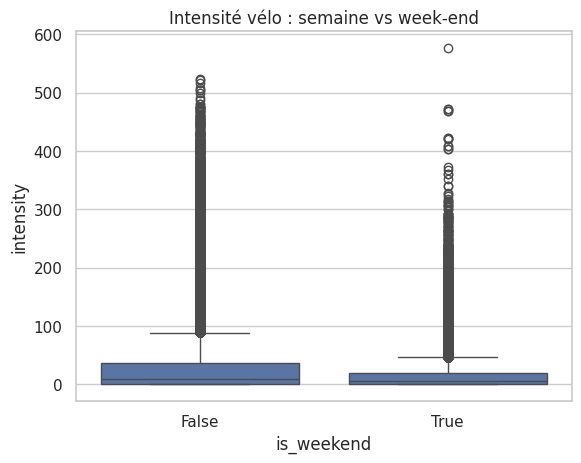

In [8]:
df_brut["weekday"] = df_brut ["datetime"].dt.weekday  # 0 = lundi ... 6 = dimanche
df_brut["is_weekend"] = df_brut["weekday"].isin([5,6])

sns.boxplot(x="is_weekend", y="intensity", data=df_brut)
plt.title("Intensité vélo : semaine vs week-end")
plt.show()

#### c) Heures de pointe

In [9]:
#c.1 Création la colonne 'hour' à partir de 'datetime'
df_brut['hour'] = pd.to_datetime(df_brut['datetime']).dt.hour

# Vérifier
print(df_brut[['datetime','hour']].head())

                   datetime  hour
0 2024-11-30 00:00:00+00:00     0
1 2024-11-30 01:00:00+00:00     1
2 2024-11-30 02:00:00+00:00     2
3 2024-11-30 03:00:00+00:00     3
4 2024-11-30 04:00:00+00:00     4


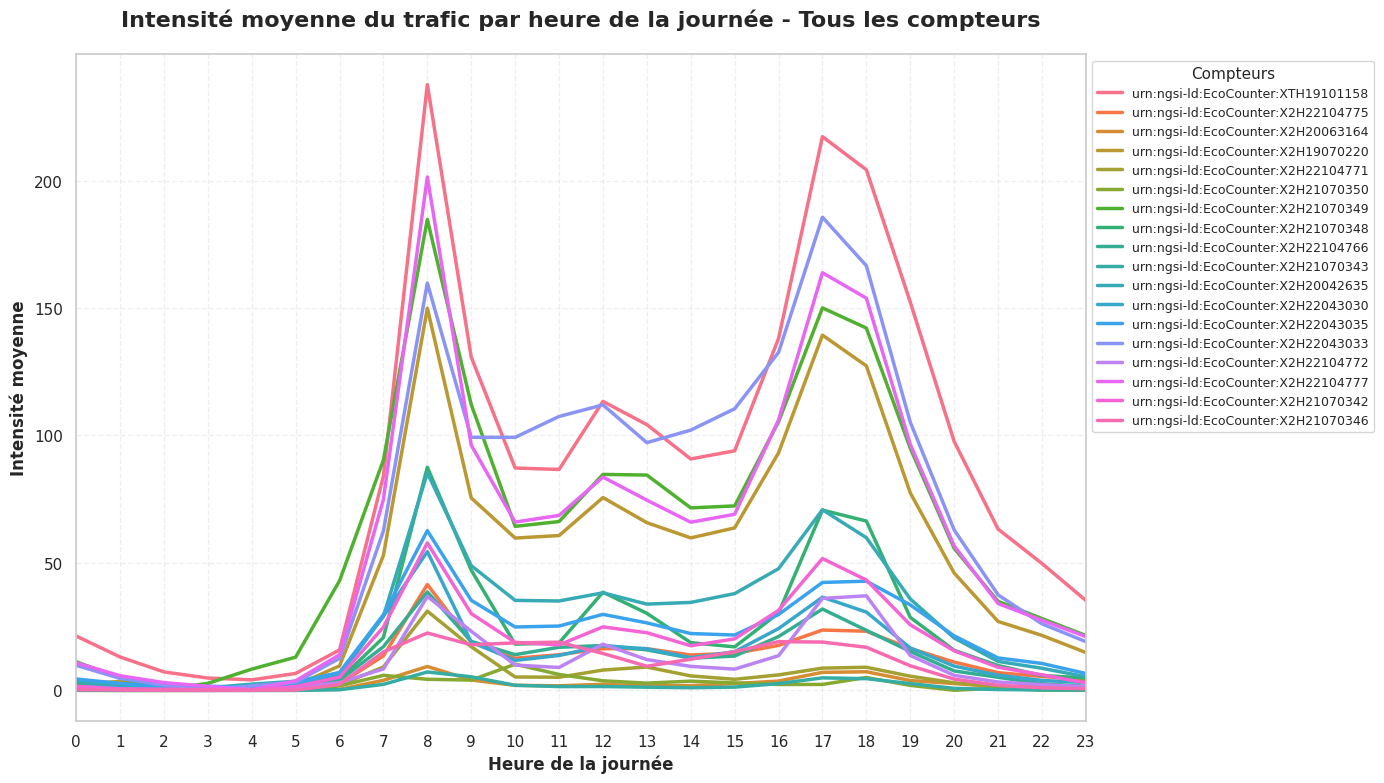

In [10]:
#C.2 # Configuration p
plt.figure(figsize=(14, 8))

# Création du graphique avec tous les compteurs
sns.lineplot(x="hour", y="intensity", hue="counter_id", data=df_brut, 
        estimator="mean", errorbar=None, linewidth=2.5)

# titres et labels
plt.title("Intensité moyenne du trafic par heure de la journée - Tous les compteurs", 
        fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Heure de la journée", fontsize=12, fontweight='bold')
plt.ylabel("Intensité moyenne", fontsize=12, fontweight='bold')

# axes
plt.xticks(range(0, 24, 1))  # Toutes les heures
plt.xlim(0, 23)
plt.grid(True, alpha=0.3, linestyle='--')

# la légende pour tous les compteurs
plt.legend(title="Compteurs", title_fontsize=11, fontsize=9, 
        loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement du layout
plt.tight_layout()

plt.show()


### OBSERVATIONS PRINCIPALES DU GRAPHIQUE:
**Profil de trafic observé**
Nuit (0h – 6h) :
Le trafic est très faible, proche de zéro entre minuit et 5h. Cela correspond aux heures de faible activité générale.

Pic matinal (6h – 9h) :
Une forte croissance du trafic commence vers 6h, avec un pic matinal entre 8h et 9h (proche de 200 véhicules/heure en moyenne).
Ce pic correspond typiquement aux déplacements domicile–travail/école.

Pause de la mi-journée (10h – 15h) :
Après le pic matinal, le trafic diminue légèrement mais reste soutenu, avec une légère baisse vers 12h–13h peut-être liée à la pause déjeuner.

Pic vespéral (16h – 19h) :
Une seconde montée du trafic est visible dès 16h, avec un pic vespéral entre 17h et 18h (aussi proche de 200 véhicules/heure).
Cela correspond aux retours du travail et aux déplacements de fin d’après-midi.

Soirée (20h – 23h) :
Le trafic décroît progressivement après 19h, pour revenir à un niveau bas après 21h–22h.

**3. Interprétation des données**
Profil bidomodal classique :

La courbe montre deux pics principaux (matin et soir), ce qui est caractéristique du trafic routier en zone urbaine ou périurbaine, lié aux activités économiques et scolaires.

Absence de pic de midi marqué :

Contrairement à certaines zones commerciales, il n’y a pas de troisième pic à l’heure du déjeuner, ce qui peut indiquer que les compteurs sont surtout placés sur des axes domicile–travail plutôt que commerciaux.

Plateau entre 9h et 16h :

Le trafic reste stable à un niveau moyen (environ 100–150 véhicules/heure), reflétant une activité continue (livraisons, déplacements professionnels, etc.).

**4. Implications possibles**

Gestion du trafic :
Les pics de 8h–9h et 17h–18h peuvent justifier des mesures de régulation (feux synchronisés, voies réservées) pour éviter la congestion.

Planification urbaine :
Ce profil suggère que les infrastructures concernées sont surtout utilisées pour des déplacements pendulaires. Une diversification des horaires de travail ou du télétravail pourrait lisser ces pics.

Maintenance des équipements :
Les plages de très faible trafic (nuit) pourraient être utilisées pour des travaux d’entretien avec un impact minimal sur les usagers.

**5. Limites de l’analyse**
Les données sont une moyenne de tous les compteurs, ce qui peut masquer des variations locales (un axe peut avoir un profil différent).

Pas d’indication sur le type de véhicules .

Pas de précision sur les jours de la semaine (le profil pourrait être très différent le week-end).

**Conclusion**
Le graphique confirme un profil de trafic pendulaire typique avec deux pics principaux aux heures de pointe du matin et du soir.
La modélisation du trafic sur ces axes pourrait aider à optimiser la signalisation, réduire les embouteillages et planifier l’entretien des routes.


## Traitement des données

In [ ]:
# Nombre de NaN par colonne
print(df_brut.isna().sum())

datetime       0
intensity      0
counter_id     0
lat            0
lon            0
laneId         0
vehicleType    0
weekday        0
is_weekend     0
hour           0
dtype: int64


In [12]:

# Pourcentage de NaN
print(df_brut.isna().mean() * 100)

datetime       0.0
intensity      0.0
counter_id     0.0
lat            0.0
lon            0.0
laneId         0.0
vehicleType    0.0
weekday        0.0
is_weekend     0.0
hour           0.0
dtype: float64


In [13]:
# Nombre total de doublons exacts sur toutes les colonnes: 
print("Nombre de doublons exacts :", df_brut.duplicated().sum())


Nombre de doublons exacts : 23257


#### verification des données doublons

In [14]:


# Afficher toutes les lignes qui sont des doublons
doublons = df_brut[df_brut.duplicated(keep=False)]  # keep=False montre toutes les occurrences
display(doublons)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
1253,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1254,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1255,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1256,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
1257,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
...,...,...,...,...,...,...,...,...,...,...
154762,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154763,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154764,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1
154765,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1


In [15]:

# Vérifier les doublons sur colonnes spécifiques
doublons_subset = df_brut[df_brut.duplicated(subset=['datetime', 'counter_id'], keep=False)]
display(doublons_subset)

,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
1253,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1254,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1255,2025-01-21 05:00:00+00:00,4.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,5
1256,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
1257,2025-01-21 06:00:00+00:00,10.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.616210,3.874408,188609530,bicycle,1,False,6
...,...,...,...,...,...,...,...,...,...,...
154762,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154763,2025-08-30 00:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,0
154764,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1
154765,2025-08-30 01:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H21070346,43.671215,3.913031,243439664,bicycle,5,True,1


In [16]:

# doublons sont exactement identiques alors supprimer
df_brut = df_brut.drop_duplicates()

### chercher les valeurs abberantes: 

In [17]:
# Intensité négative ou trop élevée (>300) .
intensity_neg = df_brut[df_brut['intensity'] < 0]
print("Valeurs négatives :")

Valeurs négatives :


In [18]:
intensity_high = df_brut[df_brut['intensity'] > 300]
print("Valeurs très élevées (>300) :")
display(intensity_high)

Valeurs très élevées (>300) :


,datetime,intensity,counter_id,lat,lon,laneId,vehicleType,weekday,is_weekend,hour
56,2024-12-02 08:00:00+00:00,398.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,0,False,8
66,2024-12-02 18:00:00+00:00,329.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,0,False,18
80,2024-12-03 08:00:00+00:00,470.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,8
89,2024-12-03 17:00:00+00:00,353.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,17
90,2024-12-03 18:00:00+00:00,328.0,urn:ngsi-ld:EcoCounter:XTH19101158,43.61621,3.874408,188609530,bicycle,1,False,18
...,...,...,...,...,...,...,...,...,...,...
138220,2025-10-15 17:00:00+00:00,303.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,2,False,17
138235,2025-10-16 08:00:00+00:00,415.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,8
138244,2025-10-16 17:00:00+00:00,307.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,17
138245,2025-10-16 18:00:00+00:00,307.0,urn:ngsi-ld:EcoCounter:X2H22104777,43.61400,3.884700,643789819,bicycle,3,False,18


In [19]:

print(intensity_high.groupby('counter_id')['intensity'].count())

counter_id
urn:ngsi-ld:EcoCounter:X2H19070220     10
urn:ngsi-ld:EcoCounter:X2H21070349     91
urn:ngsi-ld:EcoCounter:X2H22043033    109
urn:ngsi-ld:EcoCounter:X2H22104777    161
urn:ngsi-ld:EcoCounter:XTH19101158    330
Name: intensity, dtype: int64


1️ Remplacer les valeurs aberrantes avant interpolation

d’abord on doit limiter les valeurs extrêmes (par exemple <0 ou >300) pour éviter que l’interpolation les propage :

In [20]:
# Clip pour garder les valeurs dans une plage raisonnable: 
df_brut['intensity'] = df_brut['intensity'].clip(lower=0, upper=300)

2️ Interpolation par compteur
interpoler chaque compteur séparément pour tenir compte de la série temporelle :

In [21]:
# Assurer que datetime est trié
df_brut = df_brut.sort_values(['counter_id', 'datetime'])

# Interpolation linéaire par compteur
df_brut['intensity'] = df_brut.groupby('counter_id')['intensity'].transform(lambda x: x.interpolate(method='linear'))
print(df_brut['intensity'].isna().sum())

0


# Cree une Dataset principal (>=365 jours)

In [22]:
#  1️ Filtrer les compteurs fiables (durée >= 162 jours)
reliable_counters = duration[duration["days"] >= 162].index.tolist()
df_365 = df_brut[df_brut ["counter_id"].isin(reliable_counters)].copy()

#  2️ Ajouter les colonnes temporelles
df_365["hour"] = df_365["datetime"].dt.hour # c'est 
df_365["weekday"] = df_365["datetime"].dt.weekday  # 0 = lundi
df_365["is_weekend"] = df_365["weekday"].isin([5,6]).astype(int)

#  3️ Créer df_description ( car on n'est pas fait au debut )
all_desc = []

for counter_id in reliable_counters:
    url_desc = f"https://portail-api-data.montpellier3m.fr/ecocounter/{counter_id}"
    response_desc = requests.get(url_desc)
    
    if response_desc.status_code == 200:
        data_desc = response_desc.json()
        lat, lon = data_desc["location"]["value"]["coordinates"]
        laneId = data_desc.get("laneId", {}).get("value", None)
        vehicleType = data_desc.get("vehicleType", {}).get("value", None)
        
        all_desc.append({
            "counter_id": counter_id,
            "lat": lat,
            "lon": lon,
            "laneId": laneId,
            "vehicleType": vehicleType
        })
    else:
        all_desc.append({
            "counter_id": counter_id,
            "lat": None,
            "lon": None,
            "laneId": None,
            "vehicleType": None
        })

df_description = pd.DataFrame(all_desc)

#  4️ Merge pour ajouter les colonnes statiques au df_162
df_365 = df_365.merge(df_description, on="counter_id", how="left")

#  5️ des features pour prédiction
# Moyenne glissante sur 3 heures
df_365["rolling_3h"] = df_365.groupby("counter_id")["intensity"].transform(lambda x: x.rolling(3, min_periods=1).mean())
# Décalages temporels
df_365["lag_1h"] = df_365.groupby("counter_id")["intensity"].shift(1)
df_365["lag_24h"] = df_365.groupby("counter_id")["intensity"].shift(24)

#  Vérification rapide
display(df_365.head())
print("Nombre de lignes :", len(df_365))
print("Liste des compteurs dans df_365 :", df_365["counter_id"].unique())

,datetime,intensity,counter_id,lat_x,lon_x,laneId_x,vehicleType_x,weekday,is_weekend,hour,lat_y,lon_y,laneId_y,vehicleType_y,rolling_3h,lag_1h,lag_24h
0,2024-11-30 00:00:00+00:00,5.0,urn:ngsi-ld:EcoCounter:X2H19070220,43.6097,3.89694,121403593,bicycle,5,1,0,43.6097,3.89694,121403593,bicycle,5.000000,NaN,NaN
1,2024-11-30 01:00:00+00:00,3.0,urn:ngsi-ld:EcoCounter:X2H19070220,43.6097,3.89694,121403593,bicycle,5,1,1,43.6097,3.89694,121403593,bicycle,4.000000,5.0,NaN
2,2024-11-30 02:00:00+00:00,6.0,urn:ngsi-ld:EcoCounter:X2H19070220,43.6097,3.89694,121403593,bicycle,5,1,2,43.6097,3.89694,121403593,bicycle,4.666667,3.0,NaN
3,2024-11-30 03:00:00+00:00,0.0,urn:ngsi-ld:EcoCounter:X2H19070220,43.6097,3.89694,121403593,bicycle,5,1,3,43.6097,3.89694,121403593,bicycle,3.000000,6.0,NaN
4,2024-11-30 04:00:00+00:00,1.0,urn:ngsi-ld:EcoCounter:X2H19070220,43.6097,3.89694,121403593,bicycle,5,1,4,43.6097,3.89694,121403593,bicycle,2.333333,0.0,NaN


Nombre de lignes : 132562
Liste des compteurs dans df_365 : ['urn:ngsi-ld:EcoCounter:X2H19070220' 'urn:ngsi-ld:EcoCounter:X2H20042635'
 'urn:ngsi-ld:EcoCounter:X2H20063164' 'urn:ngsi-ld:EcoCounter:X2H21070342'
 'urn:ngsi-ld:EcoCounter:X2H21070343' 'urn:ngsi-ld:EcoCounter:X2H21070346'
 'urn:ngsi-ld:EcoCounter:X2H21070348' 'urn:ngsi-ld:EcoCounter:X2H21070349'
 'urn:ngsi-ld:EcoCounter:X2H22043030' 'urn:ngsi-ld:EcoCounter:X2H22043033'
 'urn:ngsi-ld:EcoCounter:X2H22043035' 'urn:ngsi-ld:EcoCounter:X2H22104766'
 'urn:ngsi-ld:EcoCounter:X2H22104771' 'urn:ngsi-ld:EcoCounter:X2H22104772'
 'urn:ngsi-ld:EcoCounter:X2H22104775' 'urn:ngsi-ld:EcoCounter:X2H22104777'
 'urn:ngsi-ld:EcoCounter:XTH19101158']


In [23]:

# 
df_365 = df_365.rename(columns={
    "lat_y": "lat",
    "lon_y": "lon",
    "laneId_y": "laneId",
    "vehicleType_y": "vehicleType"
})

In [24]:

df_365 = df_365.drop(columns=[
    "lat_x", 
    "lon_x", 
    "laneId_x", 
    "vehicleType_x"
])
print(df_365.columns)

Index(['datetime', 'intensity', 'counter_id', 'weekday', 'is_weekend', 'hour',
       'lat', 'lon', 'laneId', 'vehicleType', 'rolling_3h', 'lag_1h',
       'lag_24h'],
      dtype='object')


In [25]:
df_365.to_csv("../data/processed/df_365_clean.csv", index=False)

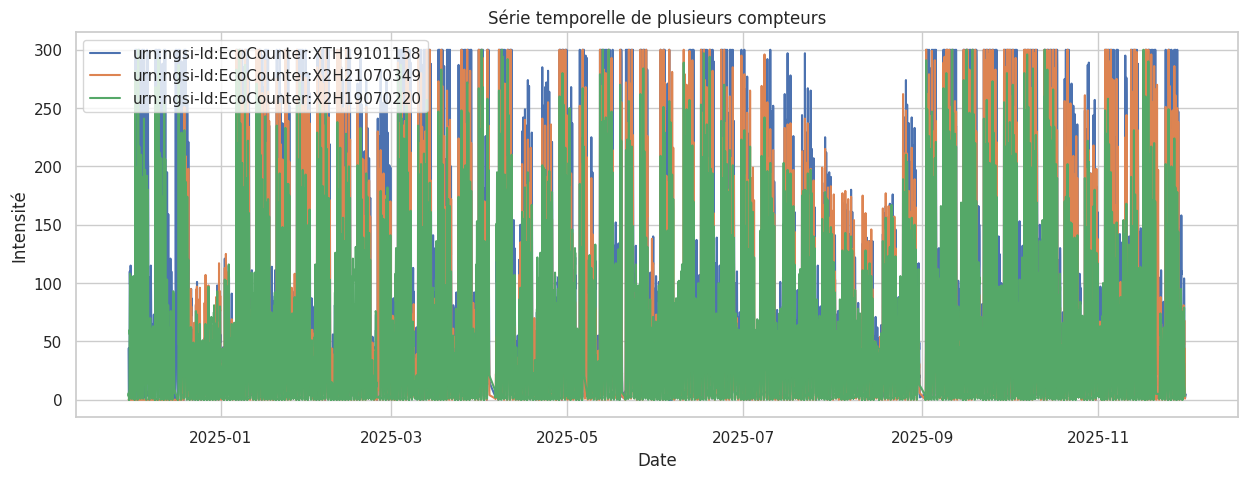

>= 365 jours : 12
>= 200jours : 5
< 100 jours : 1


In [26]:

### Visualisation des compteurs retenus ( les plus fort )
import matplotlib.pyplot as plt

compteurs = [
    "urn:ngsi-ld:EcoCounter:XTH19101158",
    "urn:ngsi-ld:EcoCounter:X2H21070349",
    "urn:ngsi-ld:EcoCounter:X2H19070220"
]

plt.figure(figsize=(15,5))

for compteur in compteurs:
    df_plot = df_brut[df_brut["counter_id"] == compteur]
    plt.plot(df_plot["datetime"], df_plot["intensity"], label=compteur)

plt.xlabel("Date")
plt.ylabel("Intensité")
plt.title("Série temporelle de plusieurs compteurs")
plt.legend()
plt.show()

# 1️ Récupérer les listes de compteurs par catégorie
counters_365 = duration[duration["category"] == "plus de 365 jours"].index.tolist()
counters_200 = duration[duration["category"] == "200 jours ou plus"].index.tolist()
counters_100 = duration[duration["category"] == "moins de 100 jours"].index.tolist()

print(">= 365 jours :", len(counters_365))
print(">= 200jours :", len(counters_200))
print("< 100 jours :", len(counters_100))


In [27]:

### Creation des datsets supplementaires 
df_200 = df_brut[df_brut["counter_id"].isin(counters_200)].copy()
df_100 = df_brut[df_brut["counter_id"].isin(counters_100)].copy()
print("df_brut :", df_brut.shape)
print("df_365 :", df_365.shape)
print("df_200 :", df_200.shape)
print("df_100 :", df_100.shape)

print("\nCompteurs dans df_365 :")
print(df_365["counter_id"].nunique())

print("\nCompteurs dans df_200 :")
print(df_200["counter_id"].nunique())

print("\nCompteurs dans df_100 :")
print(df_100["counter_id"].nunique())


df_brut : (133693, 10)
df_365 : (132562, 13)
df_200 : (30136, 10)
df_100 : (1131, 10)

Compteurs dans df_365 :
17

Compteurs dans df_200 :
5

Compteurs dans df_100 :
1


## 1) Corrélation interne (api velo seule)

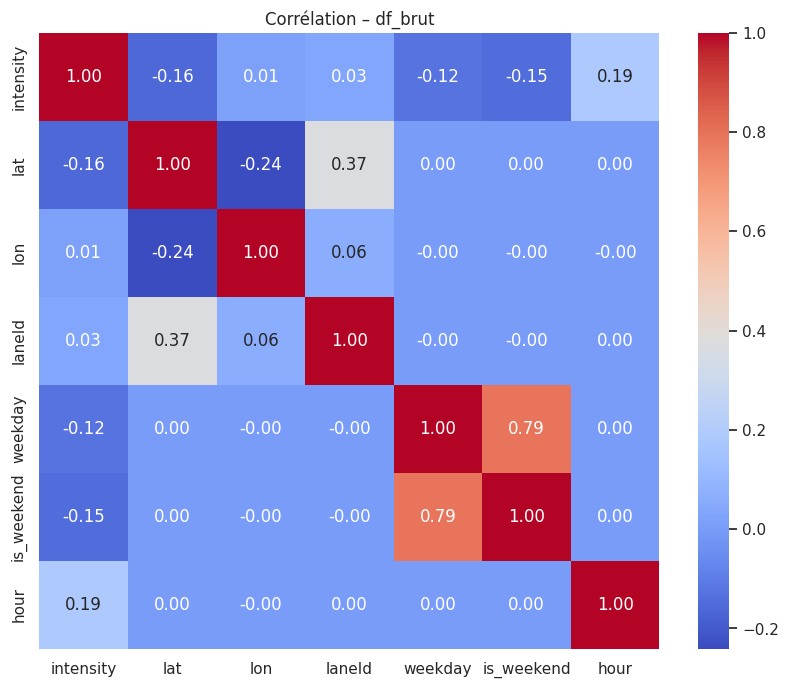

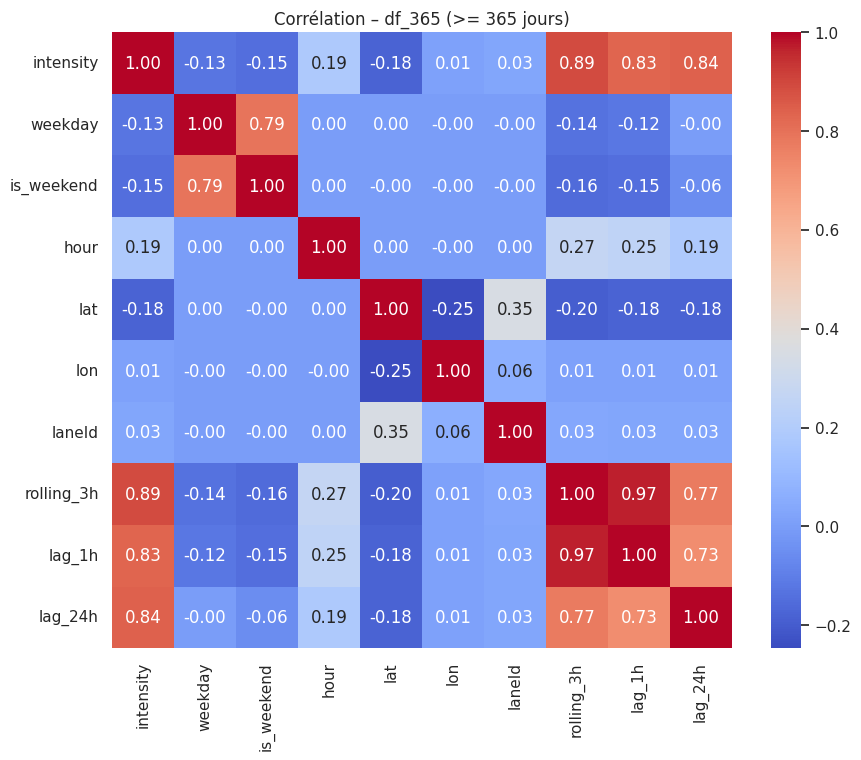

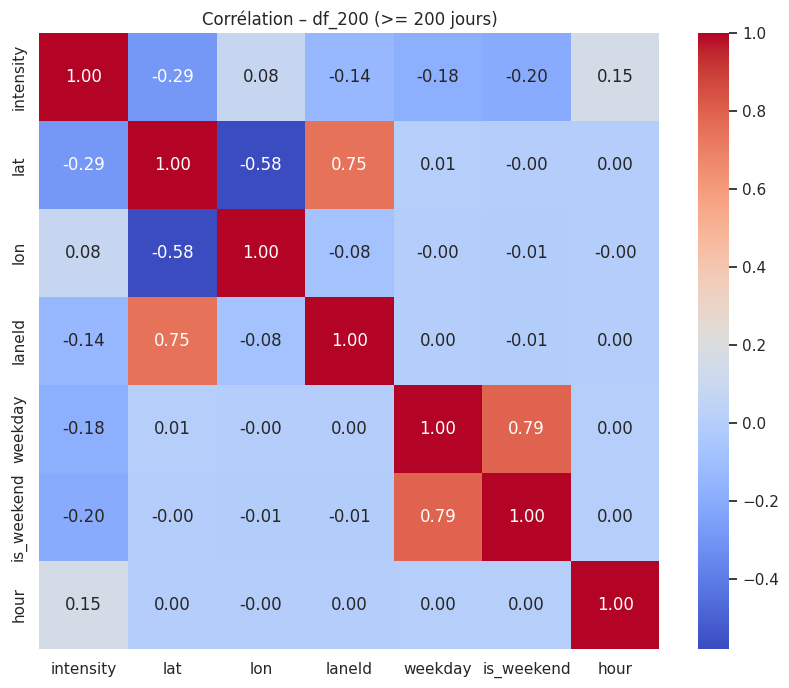

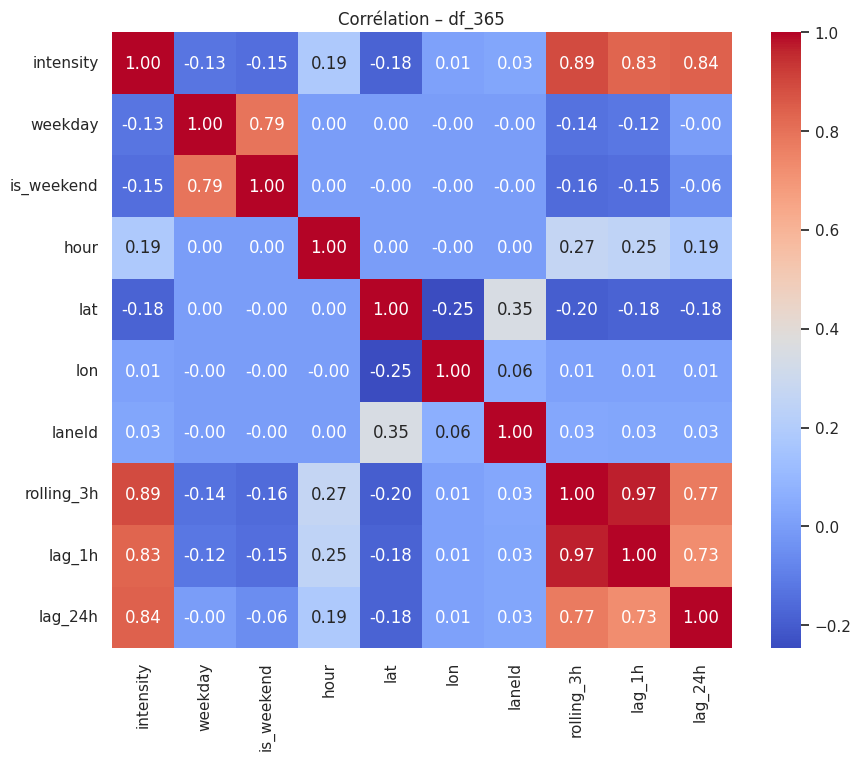

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Corrélations
plot_correlation(df_brut, "Corrélation – df_brut")
plot_correlation(df_365, "Corrélation – df_365 (>= 365 jours)")
plot_correlation(df_200, "Corrélation – df_200 (>= 200 jours)")

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df, title):
    plt.figure(figsize=(10, 8))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Corrélations
plot_correlation(df_365, "Corrélation – df_365")


## 2) Corrélation avec la météo (ma_meteo_export.csv)

 Objectif :
Voir si l’intensité vélo dépend :

de la température

de la pluie

du vent

de l'humidité


In [32]:

#2.1 Charger la météo: 
df_meteo = pd.read_csv(
    "../data/raw/ma_meteo.csv",  
    decimal=",", 
    )   
## Convertir datetime        
df_meteo["datetime"] = pd.to_datetime(df_meteo["datetime"])
# Vérification
print(df_meteo.dtypes)
display(df_meteo.head())


datetime          datetime64[ns]
temperature_2m           float64
wind_speed_10m           float64
precipitation            float64
dtype: object


,datetime,temperature_2m,wind_speed_10m,precipitation
0,2024-11-30 00:00:00,5.8,7.9,0.0
1,2024-11-30 01:00:00,5.2,8.7,0.0
2,2024-11-30 02:00:00,5.0,9.0,0.0
3,2024-11-30 03:00:00,5.0,8.9,0.0
4,2024-11-30 04:00:00,4.8,8.3,0.0


In [33]:

# 2.2 Fusionner la météo avec les datasets vélo:   merge par datetime :
def merge_meteo(df_velo, df_meteo):
    df = df_velo.merge(df_meteo, on="datetime", how="left")
    return df

df_brut["datetime"] = df_brut["datetime"].dt.tz_convert(None)
df_365["datetime"] = df_365["datetime"].dt.tz_convert(None)
df_200["datetime"] = df_200["datetime"].dt.tz_convert(None)
df_100["datetime"] = df_100["datetime"].dt.tz_convert(None)
# verification: 
print(df_brut["datetime"].dtype)
print(df_meteo["datetime"].dtype)


datetime64[ns]
datetime64[ns]


In [34]:

# uniformiser dans l’autre sens (mettre UTC aussi dans météo)
df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize("UTC")

In [35]:
print("df_brut :", df_brut["datetime"].dtype)
print("df_meteo :", df_meteo["datetime"].dtype)
print(df_brut["datetime"].head())
print(df_meteo["datetime"].head())

df_brut : datetime64[ns]
df_meteo : datetime64[ns, UTC]
26190   2024-11-30 00:00:00
26191   2024-11-30 01:00:00
26192   2024-11-30 02:00:00
26193   2024-11-30 03:00:00
26194   2024-11-30 04:00:00
Name: datetime, dtype: datetime64[ns]
0   2024-11-30 00:00:00+00:00
1   2024-11-30 01:00:00+00:00
2   2024-11-30 02:00:00+00:00
3   2024-11-30 03:00:00+00:00
4   2024-11-30 04:00:00+00:00
Name: datetime, dtype: datetime64[ns, UTC]


In [36]:

df_meteo["datetime"] = df_meteo["datetime"].dt.tz_localize(None)

df_brut_meteo = df_brut.merge(df_meteo, on="datetime", how="left")
df_365_meteo = df_365.merge(df_meteo, on="datetime", how="left")
df_200_meteo = df_200.merge(df_meteo, on="datetime", how="left")
df_100_meteo = df_100.merge(df_meteo, on="datetime", how="left")

In [37]:

# Nombre de NaN par colonne
print(df_365_meteo.isna().sum())

datetime            0
intensity           0
counter_id          0
weekday             0
is_weekend          0
hour                0
lat                 0
lon                 0
laneId              0
vehicleType         0
rolling_3h          0
lag_1h             17
lag_24h           408
temperature_2m      0
wind_speed_10m      0
precipitation       0
dtype: int64


In [38]:

# Pourcentage de NaN
print(df_365_meteo.isna().mean() * 100)

datetime          0.000000
intensity         0.000000
counter_id        0.000000
weekday           0.000000
is_weekend        0.000000
hour              0.000000
lat               0.000000
lon               0.000000
laneId            0.000000
vehicleType       0.000000
rolling_3h        0.000000
lag_1h            0.012824
lag_24h           0.307781
temperature_2m    0.000000
wind_speed_10m    0.000000
precipitation     0.000000
dtype: float64


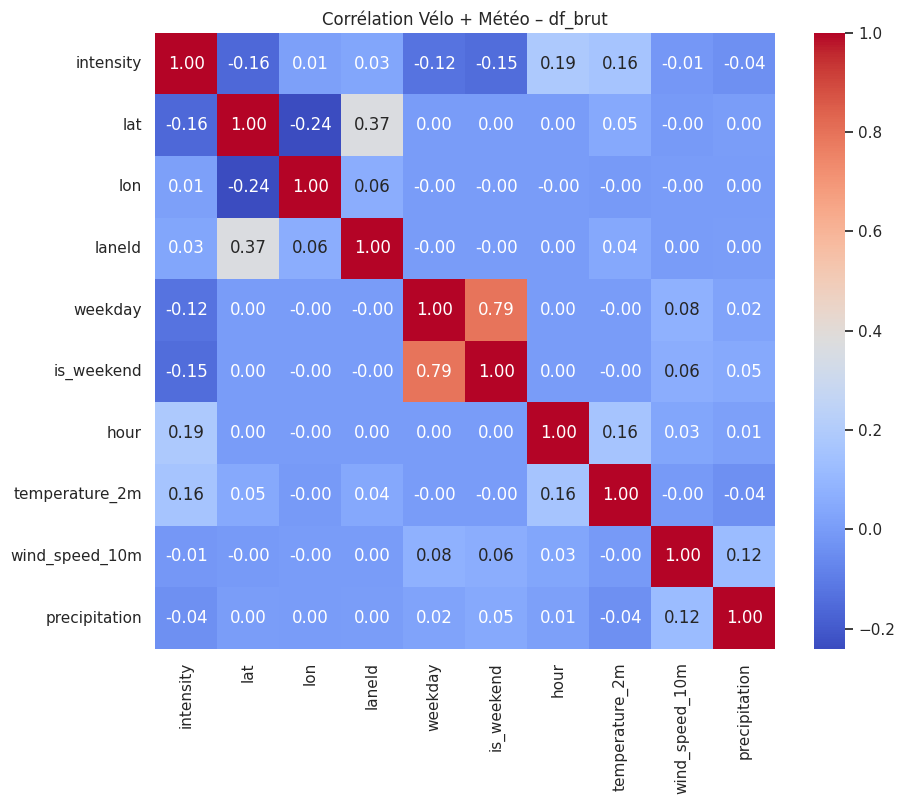

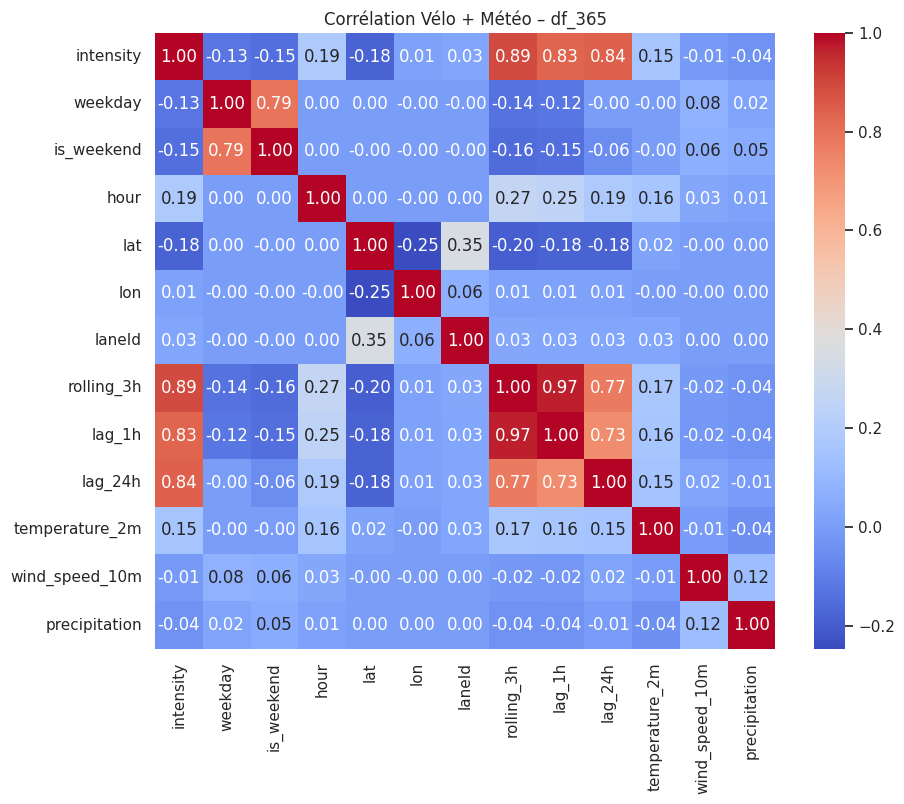

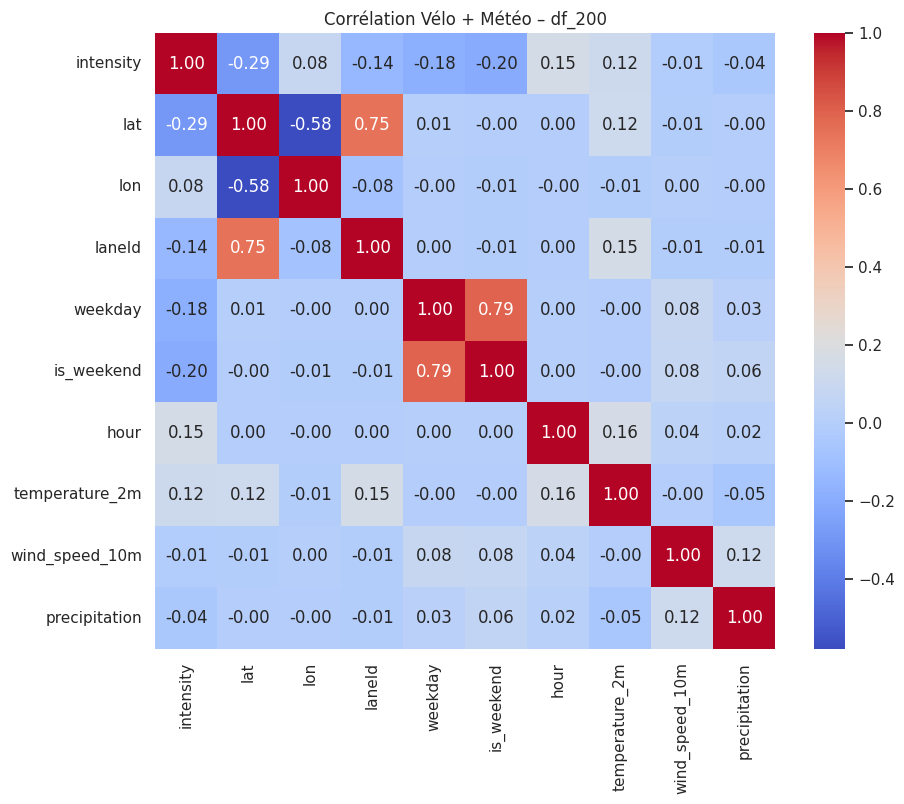

In [ ]:
# 2.3 Corrélation météo ↔ intensité
plot_correlation(df_brut_meteo, "Corrélation Vélo + Météo – df_brut")
plot_correlation(df_365_meteo, "Corrélation Vélo + Météo – df_365")
plot_correlation(df_200_meteo, "Corrélation Vélo + Météo – df_200")


### analyse : Les corrélations sont faibles mais cohérentes avec l'intuition :

Température ↑ → Vélo ↑ (léger effet positif)

Pluie ↑ → Vélo ↓ (léger effet négatif)

Vent → pas d'effet clair
Les corrélations :

**Pluie a un effet négatif (-0.03) sur le vélo** 

**Température a un effet positif (+0.13 à +0.14)**

**Mais ces effets sont faibles en corrélation linéaire. Pour mieux les voir :

Essayer des visualisations non linéaires (boxplot par catégorie)

Tester des décalages temporels (pluie à l'heure t-1 vs vélo à l'heure t)

Utiliser des seuils pour voir les effets forts (jours de forte pluie)


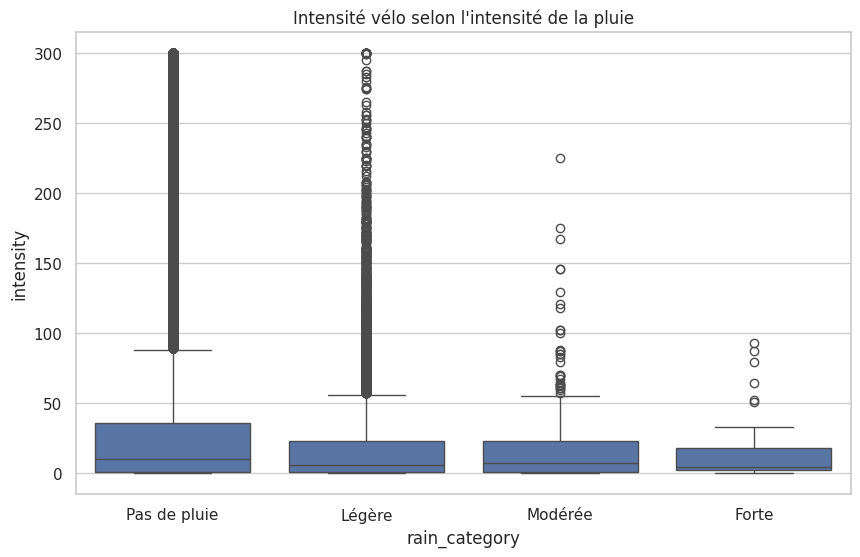

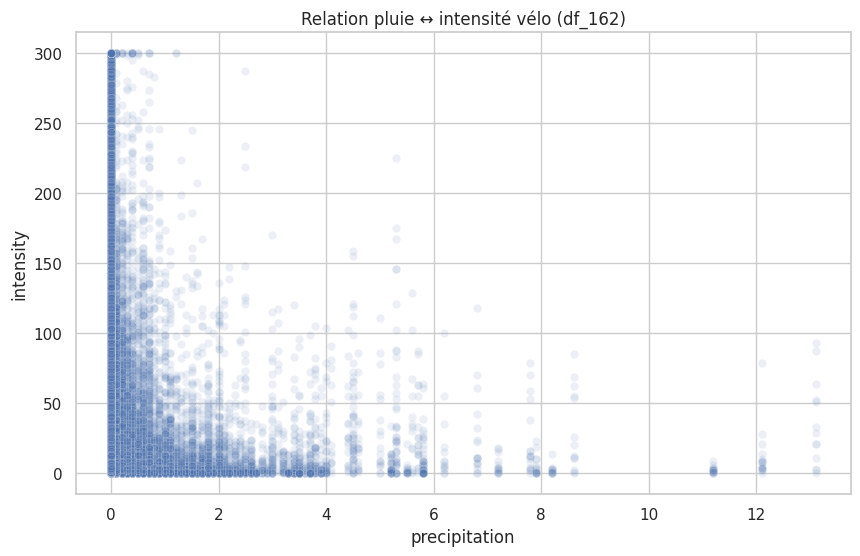

In [40]:

# 1. Créer des catégories de pluie
df_365_meteo['rain_category'] = pd.cut(df_365_meteo['precipitation'], 
                                    bins=[-1, 0.1, 5, 10, 50], 
                                    labels=['Pas de pluie', 'Légère', 'Modérée', 'Forte'])

# 2. Boxplot intensité par catégorie de pluie
plt.figure(figsize=(10,6))
sns.boxplot(x='rain_category', y='intensity', data=df_365_meteo)
plt.title("Intensité vélo selon l'intensité de la pluie")
plt.show()

# 3. Scatter plot avec régression
plt.figure(figsize=(10,6))
sns.scatterplot(x='precipitation', y='intensity', data=df_365_meteo, alpha=0.1)
plt.title("Relation pluie ↔ intensité vélo (df_162)")
plt.show()

# # 4. Regrouper par jour avec somme de pluie et moyenne vélo
# df_daily = df_365_meteo.groupby(df_365_meteo['datetime'].dt.date).agg({
#     'intensity': 'mean',
#     'precipitation': 'sum'
# }).reset_index()

# # Scatter plot journalier
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='precipitation', y='intensity', data=df_daily)
# plt.title("Relation journalière : pluie cumulée ↔ intensité moyenne")
# plt.show()



##  3) Autocorrélation (ACF) + partielle (PACF): 
Voir si l’intensité dépend du passé, utile pour 
1. ACF (Autocorrelation Function)
Montre la corrélation entre la série et ses décalages (lags)

Si les barres restent longtemps au-dessus de 0 → tendance ou saisonnalité forte

2. PACF (Partial Autocorrelation Function)
Montre la corrélation directe avec chaque lag (en retirant l'effet des lags intermédiaires)

Utile pour déterminer l'ordre p dans un modèle AR(p)

Un pic significatif à un lag donné suggère que ce lag a une influence directe

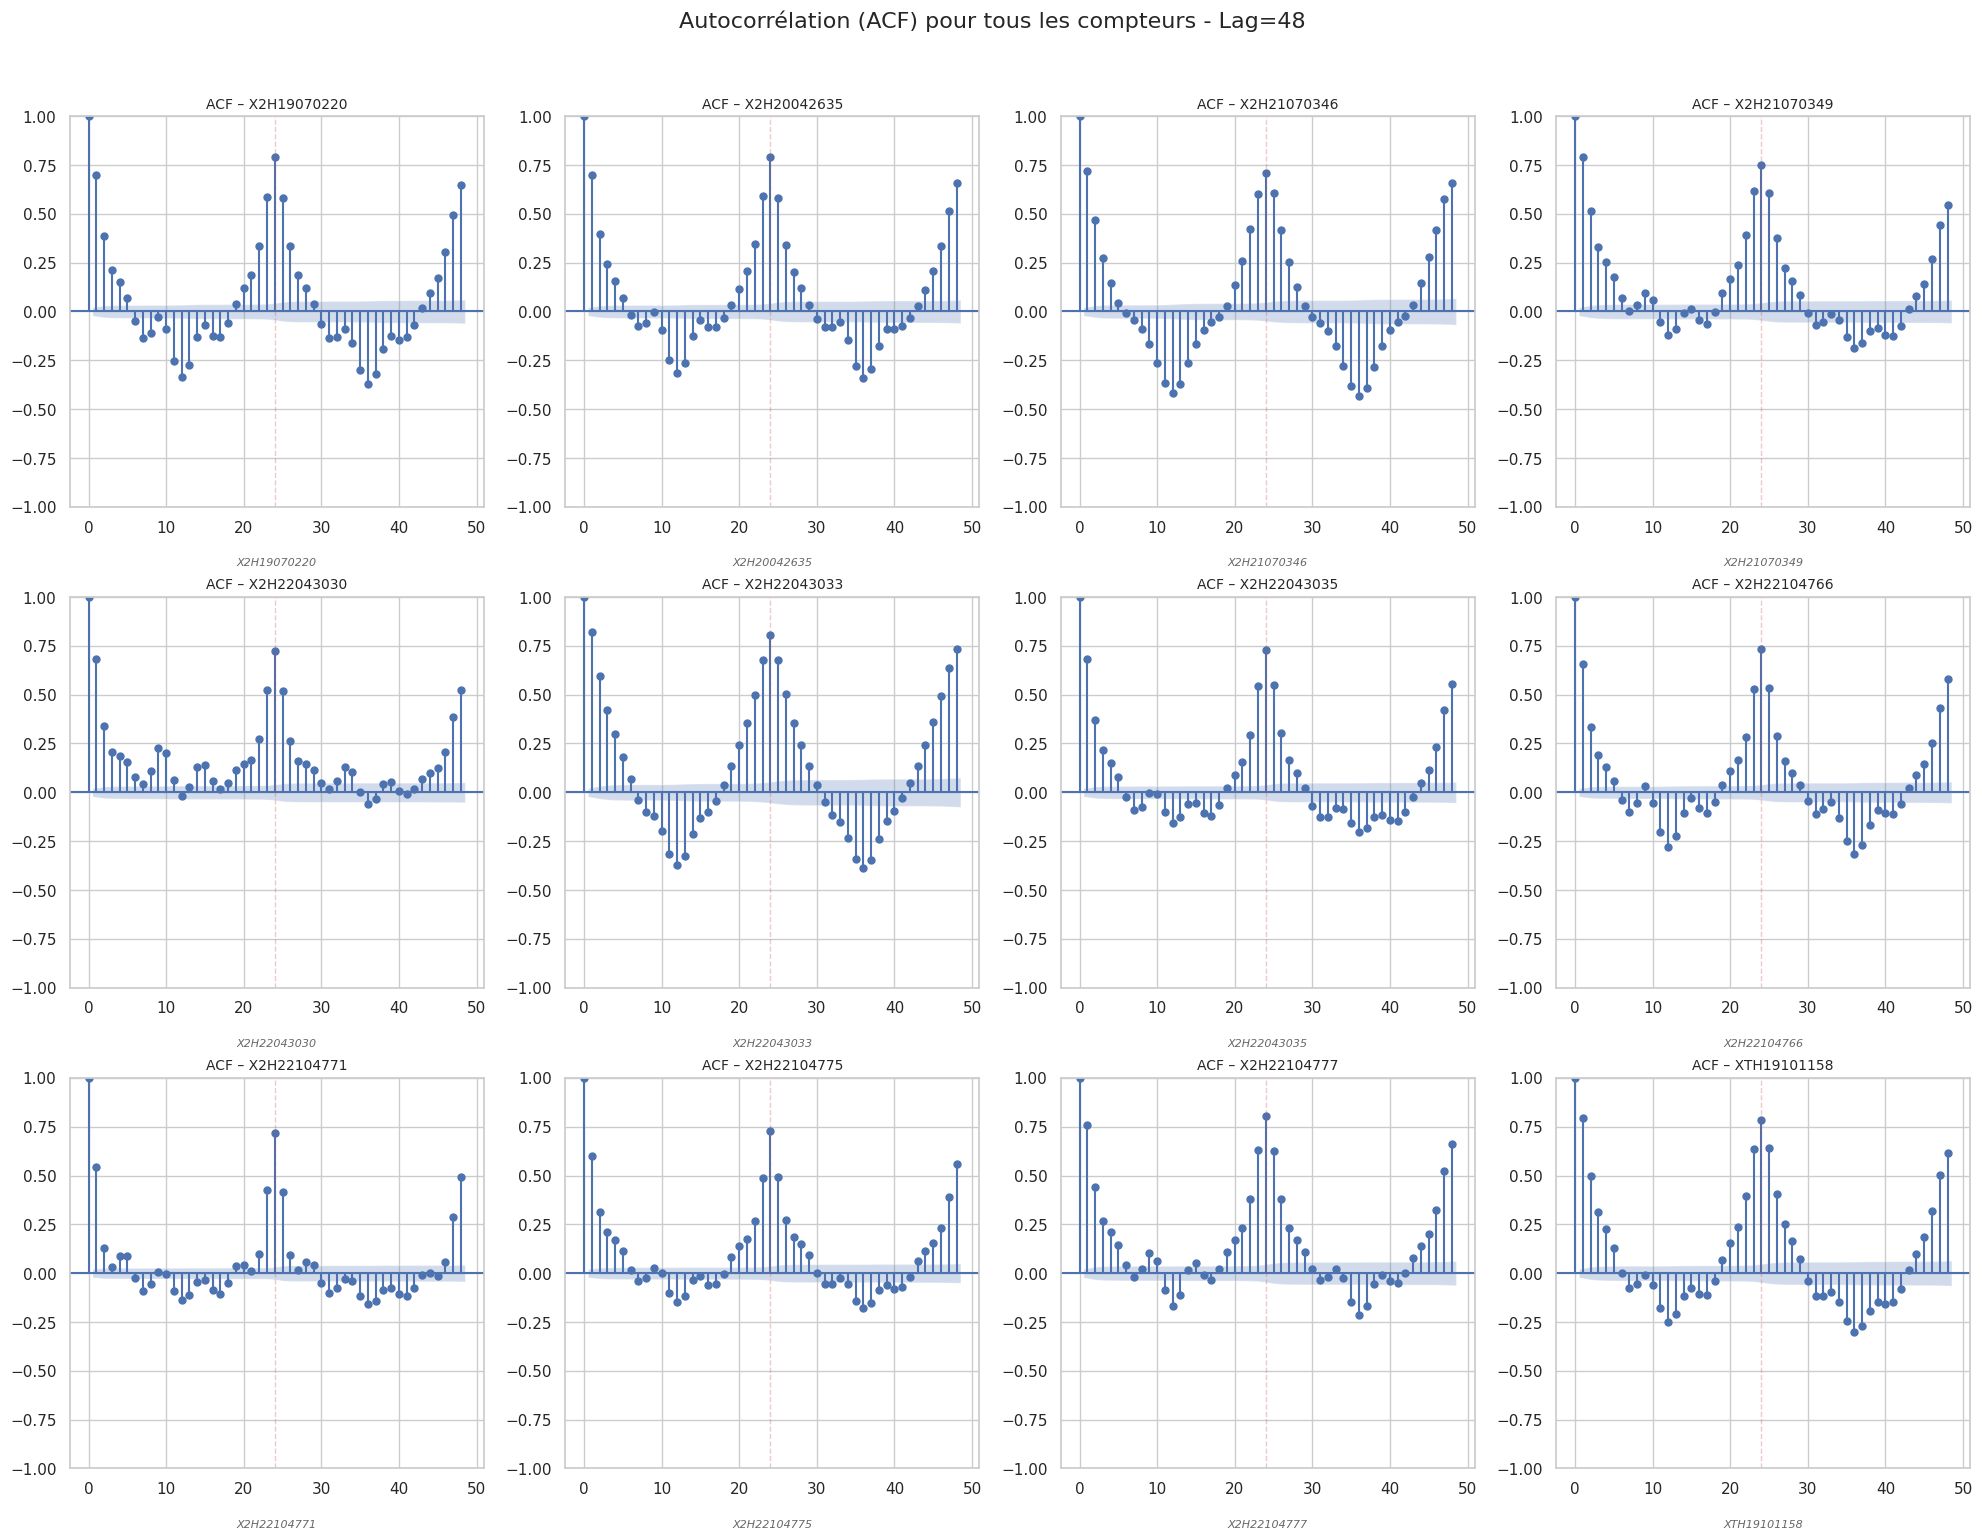

Nombre de NaN par lag :
 lag_1d     408
lag_3d    1224
lag_7d    2856
dtype: int64

Pourcentage de NaN par lag :
 lag_1d    0.307781
lag_3d    0.923342
lag_7d    2.154464
dtype: float64

Dataframe nettoyé, aperçu :


,datetime,intensity,counter_id,weekday,is_weekend,hour,lat,lon,laneId,vehicleType,lag_1d,lag_3d,lag_7d
0,2024-12-07 00:00:00,10.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,0,43.6097,3.89694,121403593,bicycle,3.0,2.0,5.0
1,2024-12-07 01:00:00,4.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,1,43.6097,3.89694,121403593,bicycle,3.0,1.0,3.0
2,2024-12-07 02:00:00,10.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,2,43.6097,3.89694,121403593,bicycle,0.0,1.0,6.0
3,2024-12-07 03:00:00,2.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,3,43.6097,3.89694,121403593,bicycle,0.0,1.0,0.0
4,2024-12-07 04:00:00,3.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,4,43.6097,3.89694,121403593,bicycle,0.0,1.0,1.0
5,2024-12-07 05:00:00,0.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,5,43.6097,3.89694,121403593,bicycle,0.0,1.0,0.0
6,2024-12-07 06:00:00,3.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,6,43.6097,3.89694,121403593,bicycle,5.0,11.0,5.0
7,2024-12-07 07:00:00,10.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,7,43.6097,3.89694,121403593,bicycle,73.0,77.0,11.0
8,2024-12-07 08:00:00,34.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,8,43.6097,3.89694,121403593,bicycle,192.0,210.0,39.0
9,2024-12-07 09:00:00,55.0,urn:ngsi-ld:EcoCounter:X2H19070220,5,1,9,43.6097,3.89694,121403593,bicycle,80.0,117.0,60.0


In [41]:
# ACF / PACF (statsmodels): from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# autocolorolation pour choisir les lags : 
# Liste spécifique des compteurs que tu veux analyser
compteurs_specifiques = [
    "urn:ngsi-ld:EcoCounter:X2H19070220",
    "urn:ngsi-ld:EcoCounter:X2H20042635",
    "urn:ngsi-ld:EcoCounter:X2H21070346",
    "urn:ngsi-ld:EcoCounter:X2H21070349",
    "urn:ngsi-ld:EcoCounter:X2H22043030",
    "urn:ngsi-ld:EcoCounter:X2H22043033",
    "urn:ngsi-ld:EcoCounter:X2H22043035",
    "urn:ngsi-ld:EcoCounter:X2H22104766",
    "urn:ngsi-ld:EcoCounter:X2H22104771",
    "urn:ngsi-ld:EcoCounter:X2H22104775",
    "urn:ngsi-ld:EcoCounter:X2H22104777",
    "urn:ngsi-ld:EcoCounter:XTH19101158"
]

# Configuration de la grille
n_compteurs = len(compteurs_specifiques)
n_cols = 4  # 4 graphiques par ligne (tu peux changer)
n_rows = int(np.ceil(n_compteurs / n_cols))

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplatir pour faciliter l'indexation

# Boucle sur les compteurs spécifiques
for idx, compteur in enumerate(compteurs_specifiques):
    if idx < len(axes):  # Éviter l'erreur si plus d'axes que de compteurs
        # Filtrer les données pour ce compteur
        df_plot = df_brut[df_brut["counter_id"] == compteur].copy()
        df_plot = df_plot.sort_values("datetime")
        series = df_plot["intensity"]
        
        # Plot ACF
        plot_acf(series, lags=48, ax=axes[idx])
        
        # Nom court pour le titre
        short_name = compteur.split(':')[-1]
        axes[idx].set_title(f"ACF – {short_name}", fontsize=10)
        
        # Ajouter une ligne à lag 24 (saisonnalité journalière)
        axes[idx].axvline(x=24, color='r', linestyle='--', alpha=0.3, linewidth=1)
        
        # Ajouter l'ID complet en bas
        axes[idx].text(0.5, -0.15, short_name, 
                    transform=axes[idx].transAxes,
                    fontsize=8, ha='center', alpha=0.7, style='italic')

# Cacher les axes non utilisés
for idx in range(len(compteurs_specifiques), len(axes)):
    axes[idx].axis('off')

# Titre principal
plt.suptitle("Autocorrélation (ACF) pour tous les compteurs - Lag=48", 
            fontsize=16, y=1.02)

plt.tight_layout()
plt.show()
# supp les lag anciennes et remplacers par des lags journaliere 
# df_365 est initial
# Étape 1️ : Supprimer les colonnes inutiles si elles existent
for col in ["rolling_3h", "lag_1h", "lag_24h"]:
    if col in df_365.columns:
        df_365.drop(columns=col, inplace=True)

# Étape 2️ : Créer uniquement les lags journaliers
# shift de 24h pour J-1, 72h pour J-3, 168h pour J-7
df_365["lag_1d"] = df_365.groupby("counter_id")["intensity"].shift(24)    # J-1
df_365["lag_3d"] = df_365.groupby("counter_id")["intensity"].shift(24*3)  # J-3
df_365["lag_7d"] = df_365.groupby("counter_id")["intensity"].shift(24*7)  # J-7

# Étape 3️ : Vérification des NaN
nan_counts = df_365[["lag_1d", "lag_3d", "lag_7d"]].isna().sum()
nan_percentage = df_365[["lag_1d", "lag_3d", "lag_7d"]].isna().mean() * 100
print("Nombre de NaN par lag :\n", nan_counts)
print("\nPourcentage de NaN par lag :\n", nan_percentage)

# Étape 4️ : Supprimer toutes les lignes avec NaN dans les lags
df_365_clean = df_365.dropna(subset=["lag_1d", "lag_3d", "lag_7d"]).reset_index(drop=True)

# Étape 5️ : Vérification finale
print("\nDataframe nettoyé, aperçu :")
display(df_365_clean.head(30))



Une corrélation proche de 1 ou -1 → forte relation linéaire.

Une corrélation proche de 0 → faible relation linéaire.
Interprétation :

Les lags journaliers (J-1 et J-7) ont une forte corrélation avec l’intensité actuelle. Cela signifie que la valeur d’un compteur hier ou il y a une semaine est très indicative de ce qui se passe aujourd’hui.

Le lag J-3 a une corrélation un peu plus faible, mais reste significative.

Conclusion :

on va garder lag_1d et lag_7d comme variables principales pour notre modèle de prévision journalière.

lag_3d peut être optionnel selon la complexité que on veut donner à notre modèle.


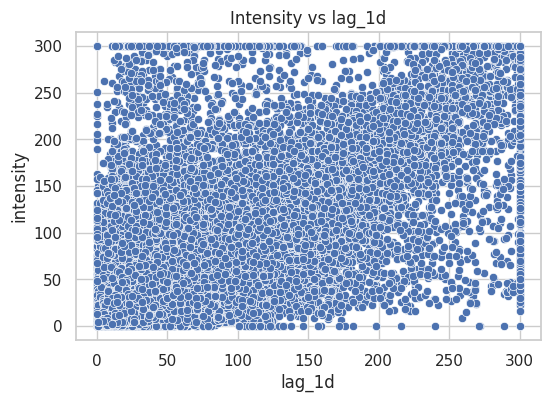

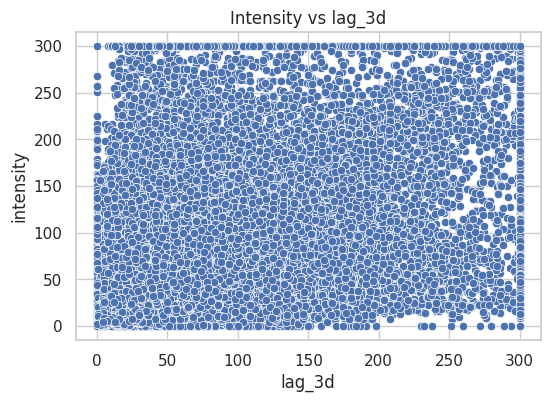

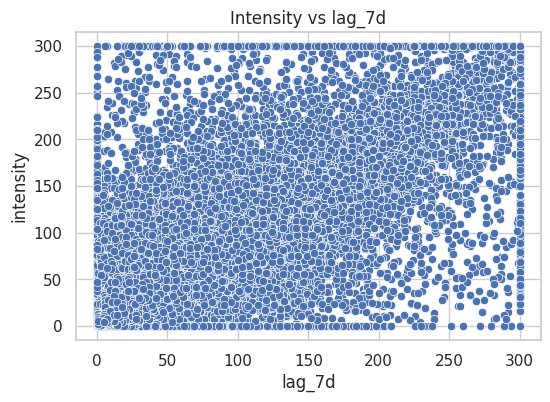

In [42]:

#visualisation avec Scatter plots : comparer intensity avec chaque lag :
import matplotlib.pyplot as plt
import seaborn as sns

lags = ["lag_1d", "lag_3d", "lag_7d"]
for lag in lags:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_365_clean[lag], y=df_365_clean["intensity"])
    plt.title(f"Intensity vs {lag}")
    plt.show()


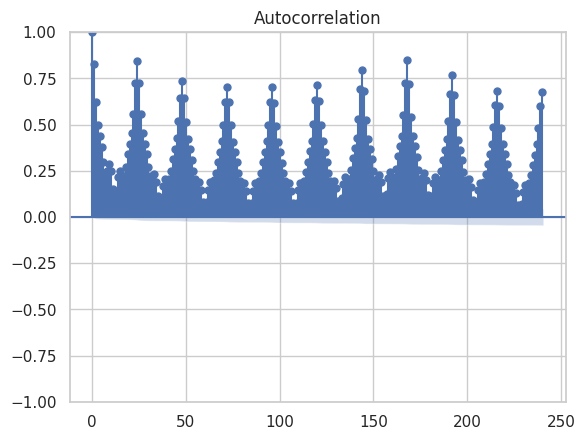

In [43]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_365_clean["intensity"], lags=24*10)  # 10 jours
plt.show()

In [ ]:

#Analyse avec régression simple:  pour Tester l’effet individuel d’un lag sur l’intensity
#pip install scikit-learn


In [44]:

from sklearn.linear_model import LinearRegression

for lag in lags:
    X_lag = df_365_clean[[lag]].dropna()
    y_lag = df_365_clean.loc[X_lag.index, "intensity"]
    model = LinearRegression().fit(X_lag, y_lag)
    print(f"{lag} coef: {model.coef_[0]:.3f}, intercept: {model.intercept_:.3f}")


lag_1d coef: 0.842, intercept: 4.717
lag_3d coef: 0.707, intercept: 8.736
lag_7d coef: 0.865, intercept: 4.046



| Lag      | Coefficient | Intercept | Interprétation                                                                                                                                             |
| -------- | ----------- | --------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `lag_1d` | 0.835       | 5.025     | Une unité supplémentaire hier (J‑1) augmente en moyenne l’intensité d’aujourd’hui de 0.835. Le modèle commence à 5.025 lorsque `lag_1d = 0`.               |
| `lag_3d` | 0.696       | 9.224     | Une augmentation de 1 à J‑3 correspond à 0.696 d’intensité aujourd’hui. L’intercept plus élevé indique que le modèle compense pour la distance temporelle. |
| `lag_7d` | 0.856       | 4.417     | Le lag J‑7 a le coefficient le plus élevé, confirmant qu’il est très prédictif pour l’intensité actuelle.                                                  |



### les prochaines étapes :
➡️ (1) Agrégations journalières

➡️ (2) Tests d’importance des features

➡️ (3) Entraînement d’un modèle Machine Learning

➡️ (4) Validation temporelle

➡️ (5) Production d’un modèle final + API

In [ ]:

### 1️ Agrégations journalières : convertir dataset horaire → dataset journalier
df_365_full = df_365_clean.merge(
    df_365_meteo[["datetime", "counter_id", "temperature_2m",
                "wind_speed_10m", "precipitation"]],
    on=["datetime", "counter_id"],
    how="left"
)

In [49]:

df_365_full.columns.tolist()


['datetime',
 'intensity',
 'counter_id',
 'weekday',
 'is_weekend',
 'hour',
 'lat',
 'lon',
 'laneId',
 'vehicleType',
 'lag_1d',
 'lag_3d',
 'lag_7d',
 'temperature_2m',
 'wind_speed_10m',
 'precipitation',
 'date']

In [50]:

df_365_full["date"] = df_365_full["datetime"].dt.date

In [52]:

df_daily = df_365_full.groupby(
    ["counter_id", "date"]
).agg({
    "intensity": "sum",
    "lag_1d": "first",
    "lag_7d": "first",
    "lag_3d": "first",
    "temperature_2m": "mean",
    "wind_speed_10m": "mean",
    "precipitation": "sum"
}).reset_index()



---> Résultat
df_daily avec :

les données agrégées par jour

les lags journaliers

les températures, vent, pluie

### 2. Vérifier l’effet des lags (importance des features)

puique j'ai déjà testé les corrélations et les régressions simples.
Maintenant, teste-les dans un vrai modèle :

➤ RandomForest: pour donne directement : quelle variable explique le mieux les intensités quotidiennes.

In [53]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df_daily[["lag_1d", "lag_7d", "lag_3d", "temperature_2m", "wind_speed_10m", "precipitation"]]
y = df_daily["intensity"]

tscv = TimeSeriesSplit(n_splits=5)

importances_list = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    importances_list.append(
        pd.Series(model.feature_importances_, index=X.columns)
    )

# Moyenne des importances
importances = pd.concat(importances_list, axis=1).mean(axis=1)
print(importances.sort_values(ascending=False))

lag_3d            0.322030
temperature_2m    0.178484
lag_1d            0.154081
wind_speed_10m    0.144436
lag_7d            0.127181
precipitation     0.073789
dtype: float64



### Les variables les plus utiles pour prédire le trafic vélo quotidien :

1️ lag_1d → effet très fort : le jour précédent influence beaucoup
2️ temperature_2m → les cyclistes sortent plus quand il fait beau
3️ lag_7d → répétition hebdomadaire (samedi, dimanche…)
4️ wind_speed_10m → vents forts réduisent la fréquentation
5️ precipitation → faible importance (peu de pluie à Montpellier)

-->  Ce pattern est extrêmement cohérent pour une ville du Sud avec météo stable.
3. Ce qu’on conclut pour les feature engineering
✔on peut garder seulement : lag_1d  et   lag_7d

✔ On peut tester :

lag_14d (répétitions bi-hebdomadaires)

rolling_7d (moyenne hebdomadaire pour lisser)

# creation de dataset final pour ML

### 1️ Re-création de df_daily avec weekday + is_weekend

In [54]:

df_daily = df_365_full.groupby(
    ["counter_id", "date"]
).agg({
    "intensity": "sum",
    "lag_1d": "first",
    "lag_7d": "first",
    "lag_3d": "first",
    "temperature_2m": "mean",
    "wind_speed_10m": "mean",
    "precipitation": "sum",
    "weekday": "first",
    "is_weekend": "first"
}).reset_index()

## 2 Ajouter rolling_7d : moyenne glissante des 7 derniers jours:
Pour :

✔ Lisser les variations quotidiennes

✔ Utile si météo instable ou tendance hebdomadaire forte

In [55]:

df_daily["rolling_7d"] = (
    df_daily.groupby("counter_id")["intensity"]
    .rolling(7)
    .mean()
    .reset_index(0, drop=True)
)



## 4️ Encodage de weekday

deux options :

Option A → Garder tel quel (int 0–6)

Bien pour les modèles arbres (RandomForest, XGBoost)

Option B → One-hot encoding

Mieux pour les modèles linéaires

On reste simple pour l’instant : on garde tel quel.

## 5️ Construire la liste des features pour le modèle

In [56]:
features = [
    "lag_1d",
    "lag_3d",
    "lag_7d",
    "temperature_2m",
    "wind_speed_10m",
    "precipitation",
    "rolling_7d",
    "weekday",
    "is_weekend"
]

target = "intensity"

## 6 Créer le dataset final utilisable pour l’entraînement

In [57]:
df_ml = df_daily.dropna(subset=features + [target]).copy()

# **Phase modélisation**

## 7️ Split Train/Test (en gardant l’ordre temporel)

In [58]:
from sklearn.model_selection import train_test_split

X = df_ml[features]
y = df_ml[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

## *8️ /1 Entraîner modèle (RandomForest)*

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 9️ Évaluer le modèle

In [60]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("R2 score :", r2)

MAE : 235.6205326680851
R2 score : 0.8300005131114605


#### graphique "réel vs prédictions"

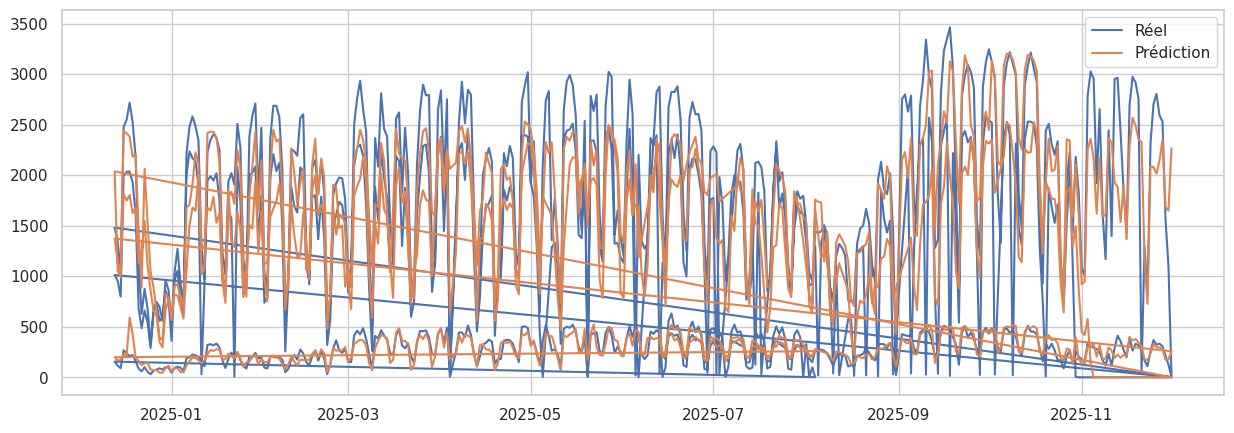

In [61]:
plt.figure(figsize=(15,5))
plt.plot(df_ml["date"].iloc[-len(y_test):], y_test.values, label="Réel")
plt.plot(df_ml["date"].iloc[-len(y_test):], y_pred, label="Prédiction")
plt.legend()
plt.show()

## 10 Exporter le modèle (pickle)

In [62]:
import pickle

with open("model_random_forest.pkl", "wb") as f:
    pickle.dump(model, f)

## 11  Faire une prédiction future (J+1)

l’observation du dernier jour :

In [ ]:

last = df_ml.sort_values("date").groupby("counter_id").tail(1)

X_last = last[features]

pred_tomorrow = model.predict(X_last)

print("Prédiction demain :", pred_tomorrow[0])

Prédiction demain : 258.39443844324194


## *8️ /2 Entraîner modèle (Prophet)*

*les prédictions Prophet pour les 14 prochains jours sont générées et affichées dans forecast_future avec :*

**yhat → prédiction centrale**

**yhat_lower et yhat_upper → intervalle de confiance (incertitude)**

In [ ]:
#pip install prophet

14:55:22 - cmdstanpy - INFO - Chain [1] start processing
14:55:22 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat   yhat_lower   yhat_upper
350 2025-12-01  1504.265382  1129.257397  1844.903769
351 2025-12-02  1596.059601  1237.714119  1940.738009
352 2025-12-03  1514.739468  1143.553299  1852.181274
353 2025-12-04  1566.723926  1209.296660  1894.111396
354 2025-12-05  1335.970069   999.442621  1707.568483
355 2025-12-06   939.503607   581.006643  1272.299790
356 2025-12-07   981.764531   650.156872  1346.984951
357 2025-12-08  1504.396868  1154.063044  1861.906076
358 2025-12-09  1596.191087  1253.334539  1962.685632
359 2025-12-10  1514.870954  1162.869186  1878.556366
360 2025-12-11  1566.855413  1218.032989  1939.537964
361 2025-12-12  1336.101555   960.776167  1669.640478
362 2025-12-13   939.635093   604.153605  1300.236493
363 2025-12-14   981.896017   625.477595  1334.909363


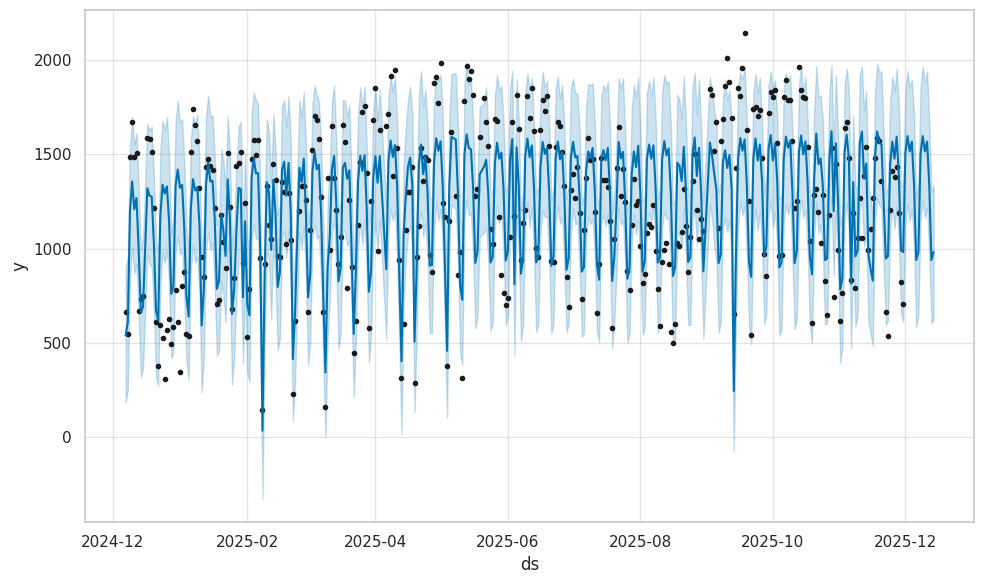

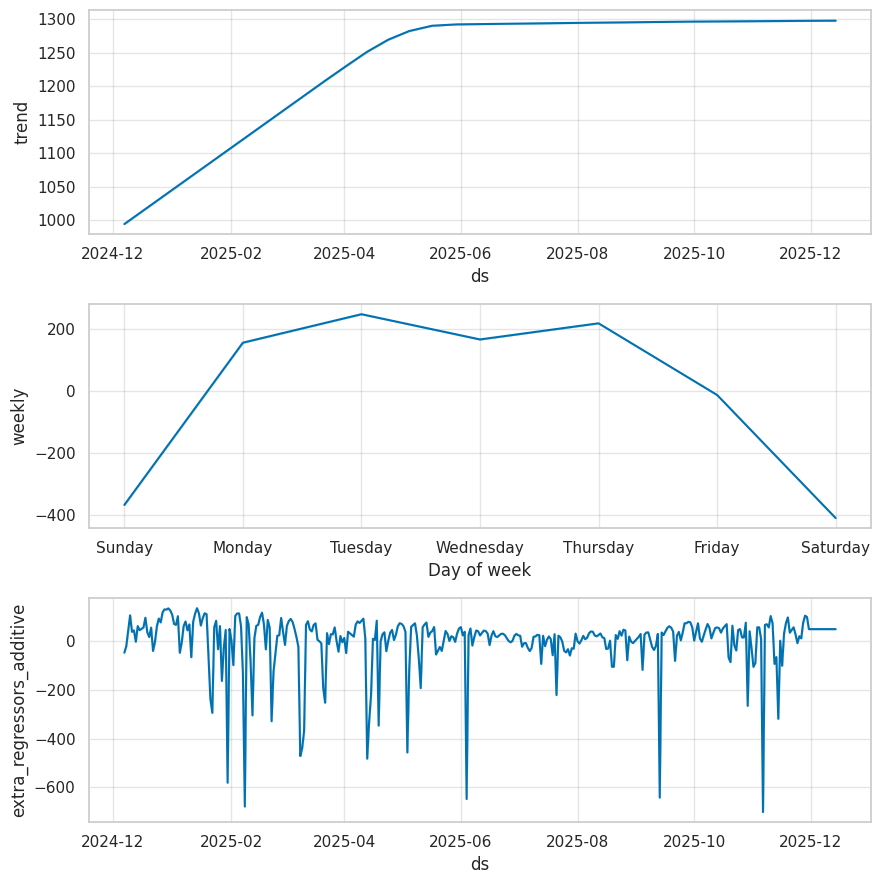

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

# 1️ Préparer le dataset pour un compteur
counter = "urn:ngsi-ld:EcoCounter:X2H19070220"
df_counter = df_daily[df_daily["counter_id"] == counter].copy()

# Renommer colonnes pour Prophet et convertir en datetime
df_prophet = df_counter[["date", "intensity", "temperature_2m", "wind_speed_10m", "precipitation"]].rename(
    columns={"date": "ds", "intensity": "y"}
)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# 2️ Créer et entraîner le modèle Prophet avec regressors
model = Prophet()
model.add_regressor("temperature_2m")
model.add_regressor("wind_speed_10m")
model.add_regressor("precipitation")
model.fit(df_prophet)

# 3️ Préparer le DataFrame futur pour 14 jours
future = pd.DataFrame()
future["ds"] = pd.date_range(start=df_prophet["ds"].max() + pd.Timedelta(days=1), periods=14)

# Ajouter les regressors pour les nouvelles dates : ici on répète la dernière valeur connue
for col in ["temperature_2m", "wind_speed_10m", "precipitation"]:
    future[col] = np.repeat(df_prophet[col].iloc[-1], 14)

# 4️ Faire la prédiction
forecast = model.predict(pd.concat([df_prophet, future], ignore_index=True))

# 5️ Visualiser
model.plot(forecast)
model.plot_components(forecast)

# 6️ Extraire uniquement les prédictions futures
forecast_future = forecast[forecast["ds"] > df_prophet["ds"].max()][["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(forecast_future)

#### Enregistrer ton modèle Prophet en .pkl

In [75]:

import joblib

# Enregistrer le modèle
joblib.dump(model, "prophet_model.pkl")

# Pour recharger le modèle plus tard
model_loaded = joblib.load("prophet_model.pkl")